<a href="https://colab.research.google.com/github/Proj-Caliber/Job-Care/blob/kimseonhong/job_care_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 모듈 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. 속성명이 같은 경우 (ex : 속성 D) 동일한 코드를 가지고 있으면 동일한 내용을 포함하고 있다. 즉 회원 속성과 컨텐츠 속성의 일치여부 및 수치를 비교할 수 있다.
(순서형 : 속성E 명목형 : 속성A, 속성C, 속성D, 속성H



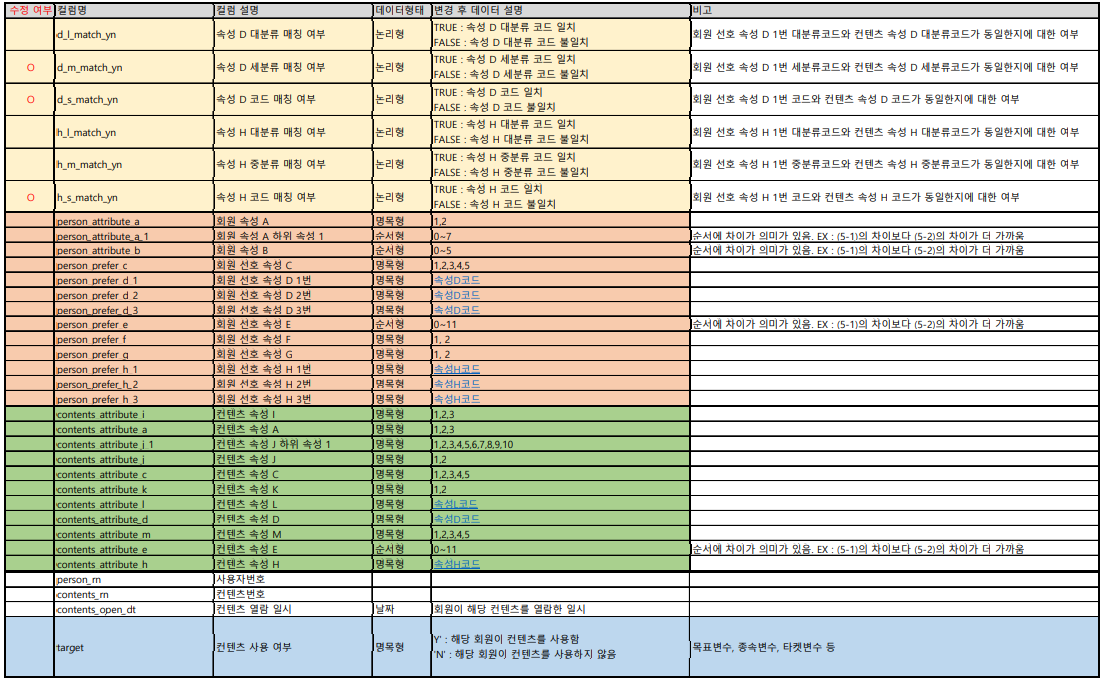

In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/jobcare/train.csv',parse_dates=['contents_open_dt'])

d_code = pd.read_csv('/content/drive/MyDrive/jobcare/속성_D_코드.csv', index_col=0).T.to_dict()

h_code = pd.read_csv('/content/drive/MyDrive/jobcare/속성_H_코드.csv', index_col=0).T.to_dict()

l_code = pd.read_csv('/content/drive/MyDrive/jobcare/속성_L_코드.csv', index_col=0).T.to_dict()

test = pd.read_csv('/content/drive/MyDrive/jobcare/test.csv',parse_dates=['contents_open_dt'])

In [ ]:
# 데이터 보기
data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [ ]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


In [ ]:
print(data.shape)
print(test.shape)


(501951, 35)
(46404, 34)


In [ ]:
#결측치 확인하기
data.isna().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
target                    0
dtype: int64

In [ ]:
test.isna().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
dtype: int64

모든데이터 결측치 없음을 확인

In [ ]:
# 각 칼럼의 value_counts 확인
for i in data.columns : 
  print( i,'의 value_count')
  print(data[i].value_counts())
  print('-'*50)

id 의 value_count
2047      1
427130    1
439420    1
441469    1
435326    1
         ..
131861    1
138006    1
135959    1
158488    1
0         1
Name: id, Length: 501951, dtype: int64
--------------------------------------------------
d_l_match_yn 의 value_count
True     315268
False    186683
Name: d_l_match_yn, dtype: int64
--------------------------------------------------
d_m_match_yn 의 value_count
False    368324
True     133627
Name: d_m_match_yn, dtype: int64
--------------------------------------------------
d_s_match_yn 의 value_count
False    426694
True      75257
Name: d_s_match_yn, dtype: int64
--------------------------------------------------
h_l_match_yn 의 value_count
True     399338
False    102613
Name: h_l_match_yn, dtype: int64
--------------------------------------------------
h_m_match_yn 의 value_count
False    318818
True     183133
Name: h_m_match_yn, dtype: int64
--------------------------------------------------
h_s_match_yn 의 value_count
False    365322
Tru

코드를 그대로 사용했습니다.

https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent

- 변경된 데이터에 맞도록 코드를 수정하였습니다.
- 매칭 여부 컬럼 (1~6 번째 컬럼) 과 속성코드로부터 구한 매칭 여부를 비교했습니다. (모두 일치)

제공 데이터에는 훈련, 테스트 데이터와 속성 코드 파일이 나뉘어 있습니다.
아래 코드는 데이터와 속성 코드를 매칭해 줍니다.

분류코드에 따라 아래와 같이 구분자를 붙혀 구분합니다.

n: 세분류코드 

s: 소분류코드   

m: 중분류코드 

l: 대분류코드 

In [ ]:
def add_code(df, d_code, h_code, l_code):
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])

    drop_column = ['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','contents_attribute_d','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_h','contents_attribute_l']

    for i in drop_column:
        df = df.drop(i, axis = 1)
    return df

train_data = add_code(data, d_code, h_code, l_code)
test_data = add_code(test, d_code, h_code, l_code)

print(train_data.shape)
print(test_data.shape)

(501951, 54)
(46404, 53)


In [ ]:
train_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_e,person_prefer_f,person_prefer_g,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_m,contents_attribute_e,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,8,1,1,3,3,10,2,1,2,1,4,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,4,1,1,1,3,5,1,1,2,1,4,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,3,1,1,3,1,10,2,1,1,1,4,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,3,1,1,1,3,5,1,1,2,5,3,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,4,1,1,1,1,10,2,1,2,1,4,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016


In [ ]:
test_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_e,person_prefer_f,person_prefer_g,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_m,contents_attribute_e,person_rn,contents_rn,contents_open_dt,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,False,False,True,True,True,1,1,2,1,4,1,1,1,3,10,2,1,2,1,5,393790,236865,2020-12-01 02:24:18,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,1146,1128,1021,2010
1,1,False,False,False,True,False,False,2,0,2,2,2,1,1,1,3,5,1,1,2,1,4,394058,236572,2020-12-17 05:42:53,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,1610,1606,1605,2016
2,2,True,False,False,True,True,True,2,3,2,1,0,1,1,3,3,3,1,1,2,3,4,1002061,704612,2020-12-10 23:33:41,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,1812,1811,1810,2020
3,3,True,False,False,True,True,True,1,2,2,5,4,1,1,3,3,5,1,1,2,5,3,1000813,704652,2020-12-03 19:44:55,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,101,100,99,2006
4,4,True,False,False,True,False,False,1,6,4,5,5,1,1,3,1,5,1,1,1,1,4,111146,704413,2020-12-11 21:24:34,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,984,980,954,2009


In [ ]:
# True = 1, False = 0 으로 바꿔주기

for i in train_data.columns[1:7] :
  train_data[i+'_1'] = 0
for i in train_data.columns[1:7] :
  train_data.loc[train_data[i] == True, i+'_1'] = 1

In [ ]:
for i in train_data.columns[1:7] : 
  train_data[i] = train_data[i+'_1']

In [ ]:
train_data = train_data.drop(['d_l_match_yn_1', 'd_m_match_yn_1', 'd_s_match_yn_1',
       'h_l_match_yn_1', 'h_m_match_yn_1', 'h_s_match_yn_1'], axis = 1)

In [ ]:
train_data

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_e,person_prefer_f,person_prefer_g,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_m,contents_attribute_e,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,1,1,1,0,0,0,1,4,3,5,8,1,1,3,3,10,2,1,2,1,4,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,1,0,0,0,1,1,0,1,3,4,1,4,1,1,1,3,5,1,1,2,1,4,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,2,0,0,0,1,0,0,2,0,3,5,3,1,1,3,1,10,2,1,1,1,4,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,3,0,0,0,1,0,0,2,0,2,5,3,1,1,1,3,5,1,1,2,5,3,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,4,1,1,1,0,0,0,1,3,4,5,4,1,1,1,1,10,2,1,2,1,4,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,0,0,0,1,0,0,1,1,2,2,3,1,1,3,3,5,1,1,2,1,5,503156,285850,2020-03-13 12:55:52,1,1192,1180,1169,926,929,928,927,926,1227,1227,1227,926,145,123,56,1,58,368,3,316,94,398,58,373,352,347,346,2006
501947,501947,1,1,0,1,0,0,1,6,2,1,4,1,1,3,3,10,2,1,2,1,4,676255,456996,2020-01-20 11:51:51,1,114,109,56,1,110,109,56,1,110,109,56,1,114,109,56,1,94,401,94,425,94,398,94,425,155,138,99,2006
501948,501948,1,1,1,1,0,0,1,7,4,1,4,1,1,3,1,5,1,1,2,2,7,484528,293258,2020-08-05 17:27:24,1,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,58,368,94,413,94,422,58,373,437,417,407,2006
501949,501949,1,0,0,1,0,0,1,1,2,1,4,1,1,3,2,5,1,1,2,3,4,456330,273797,2020-06-15 09:23:21,1,46,43,2,1,145,123,56,1,145,123,56,1,145,123,56,1,250,518,48,359,250,523,250,524,659,652,651,2006


In [ ]:
for i in test_data.columns[1:7] :
  test_data[i+'_1'] = 0
for i in test_data.columns[1:7] :
  test_data.loc[test_data[i] == True, i+'_1'] = 1

for i in test_data.columns[1:7] : 
  test_data[i] = test_data[i+'_1']

test_data = test_data.drop(['d_l_match_yn_1', 'd_m_match_yn_1', 'd_s_match_yn_1',
       'h_l_match_yn_1', 'h_m_match_yn_1', 'h_s_match_yn_1'], axis = 1)

In [ ]:
test_data

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_e,person_prefer_f,person_prefer_g,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_m,contents_attribute_e,person_rn,contents_rn,contents_open_dt,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,1,0,0,1,1,1,1,1,2,1,4,1,1,1,3,10,2,1,2,1,5,393790,236865,2020-12-01 02:24:18,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,1146,1128,1021,2010
1,1,0,0,0,1,0,0,2,0,2,2,2,1,1,1,3,5,1,1,2,1,4,394058,236572,2020-12-17 05:42:53,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,1610,1606,1605,2016
2,2,1,0,0,1,1,1,2,3,2,1,0,1,1,3,3,3,1,1,2,3,4,1002061,704612,2020-12-10 23:33:41,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,1812,1811,1810,2020
3,3,1,0,0,1,1,1,1,2,2,5,4,1,1,3,3,5,1,1,2,5,3,1000813,704652,2020-12-03 19:44:55,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,101,100,99,2006
4,4,1,0,0,1,0,0,1,6,4,5,5,1,1,3,1,5,1,1,1,1,4,111146,704413,2020-12-11 21:24:34,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,984,980,954,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,46399,1,1,1,0,0,0,2,0,4,1,4,1,1,3,3,5,1,1,2,1,5,425040,726084,2020-12-17 01:06:26,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,1,315,3,316,94,398,85,396,759,759,759,2006
46400,46400,1,0,0,1,0,0,2,0,4,1,4,1,1,3,3,10,2,1,2,1,4,290061,156948,2020-12-29 21:57:25,175,152,56,1,114,109,56,1,159,152,56,1,145,123,56,1,85,391,30,342,277,542,85,396,759,759,759,2006
46401,46401,1,1,0,1,1,1,2,0,3,1,5,1,1,3,3,10,2,1,2,1,4,307951,175069,2020-12-10 19:09:09,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,759,759,759,2006
46402,46402,1,1,0,1,1,1,1,3,3,2,6,1,1,3,1,5,1,3,2,1,5,308354,174849,2020-12-07 14:04:34,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,759,759,759,2006


In [ ]:
train_data.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_m',
       'contents_attribute_e', 'person_rn', 'contents_rn', 'contents_open_dt',
       'target', 'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m',
       'person_prefer_d_3_l', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_

# 각 칼럼 별 상관계수를 알아보자

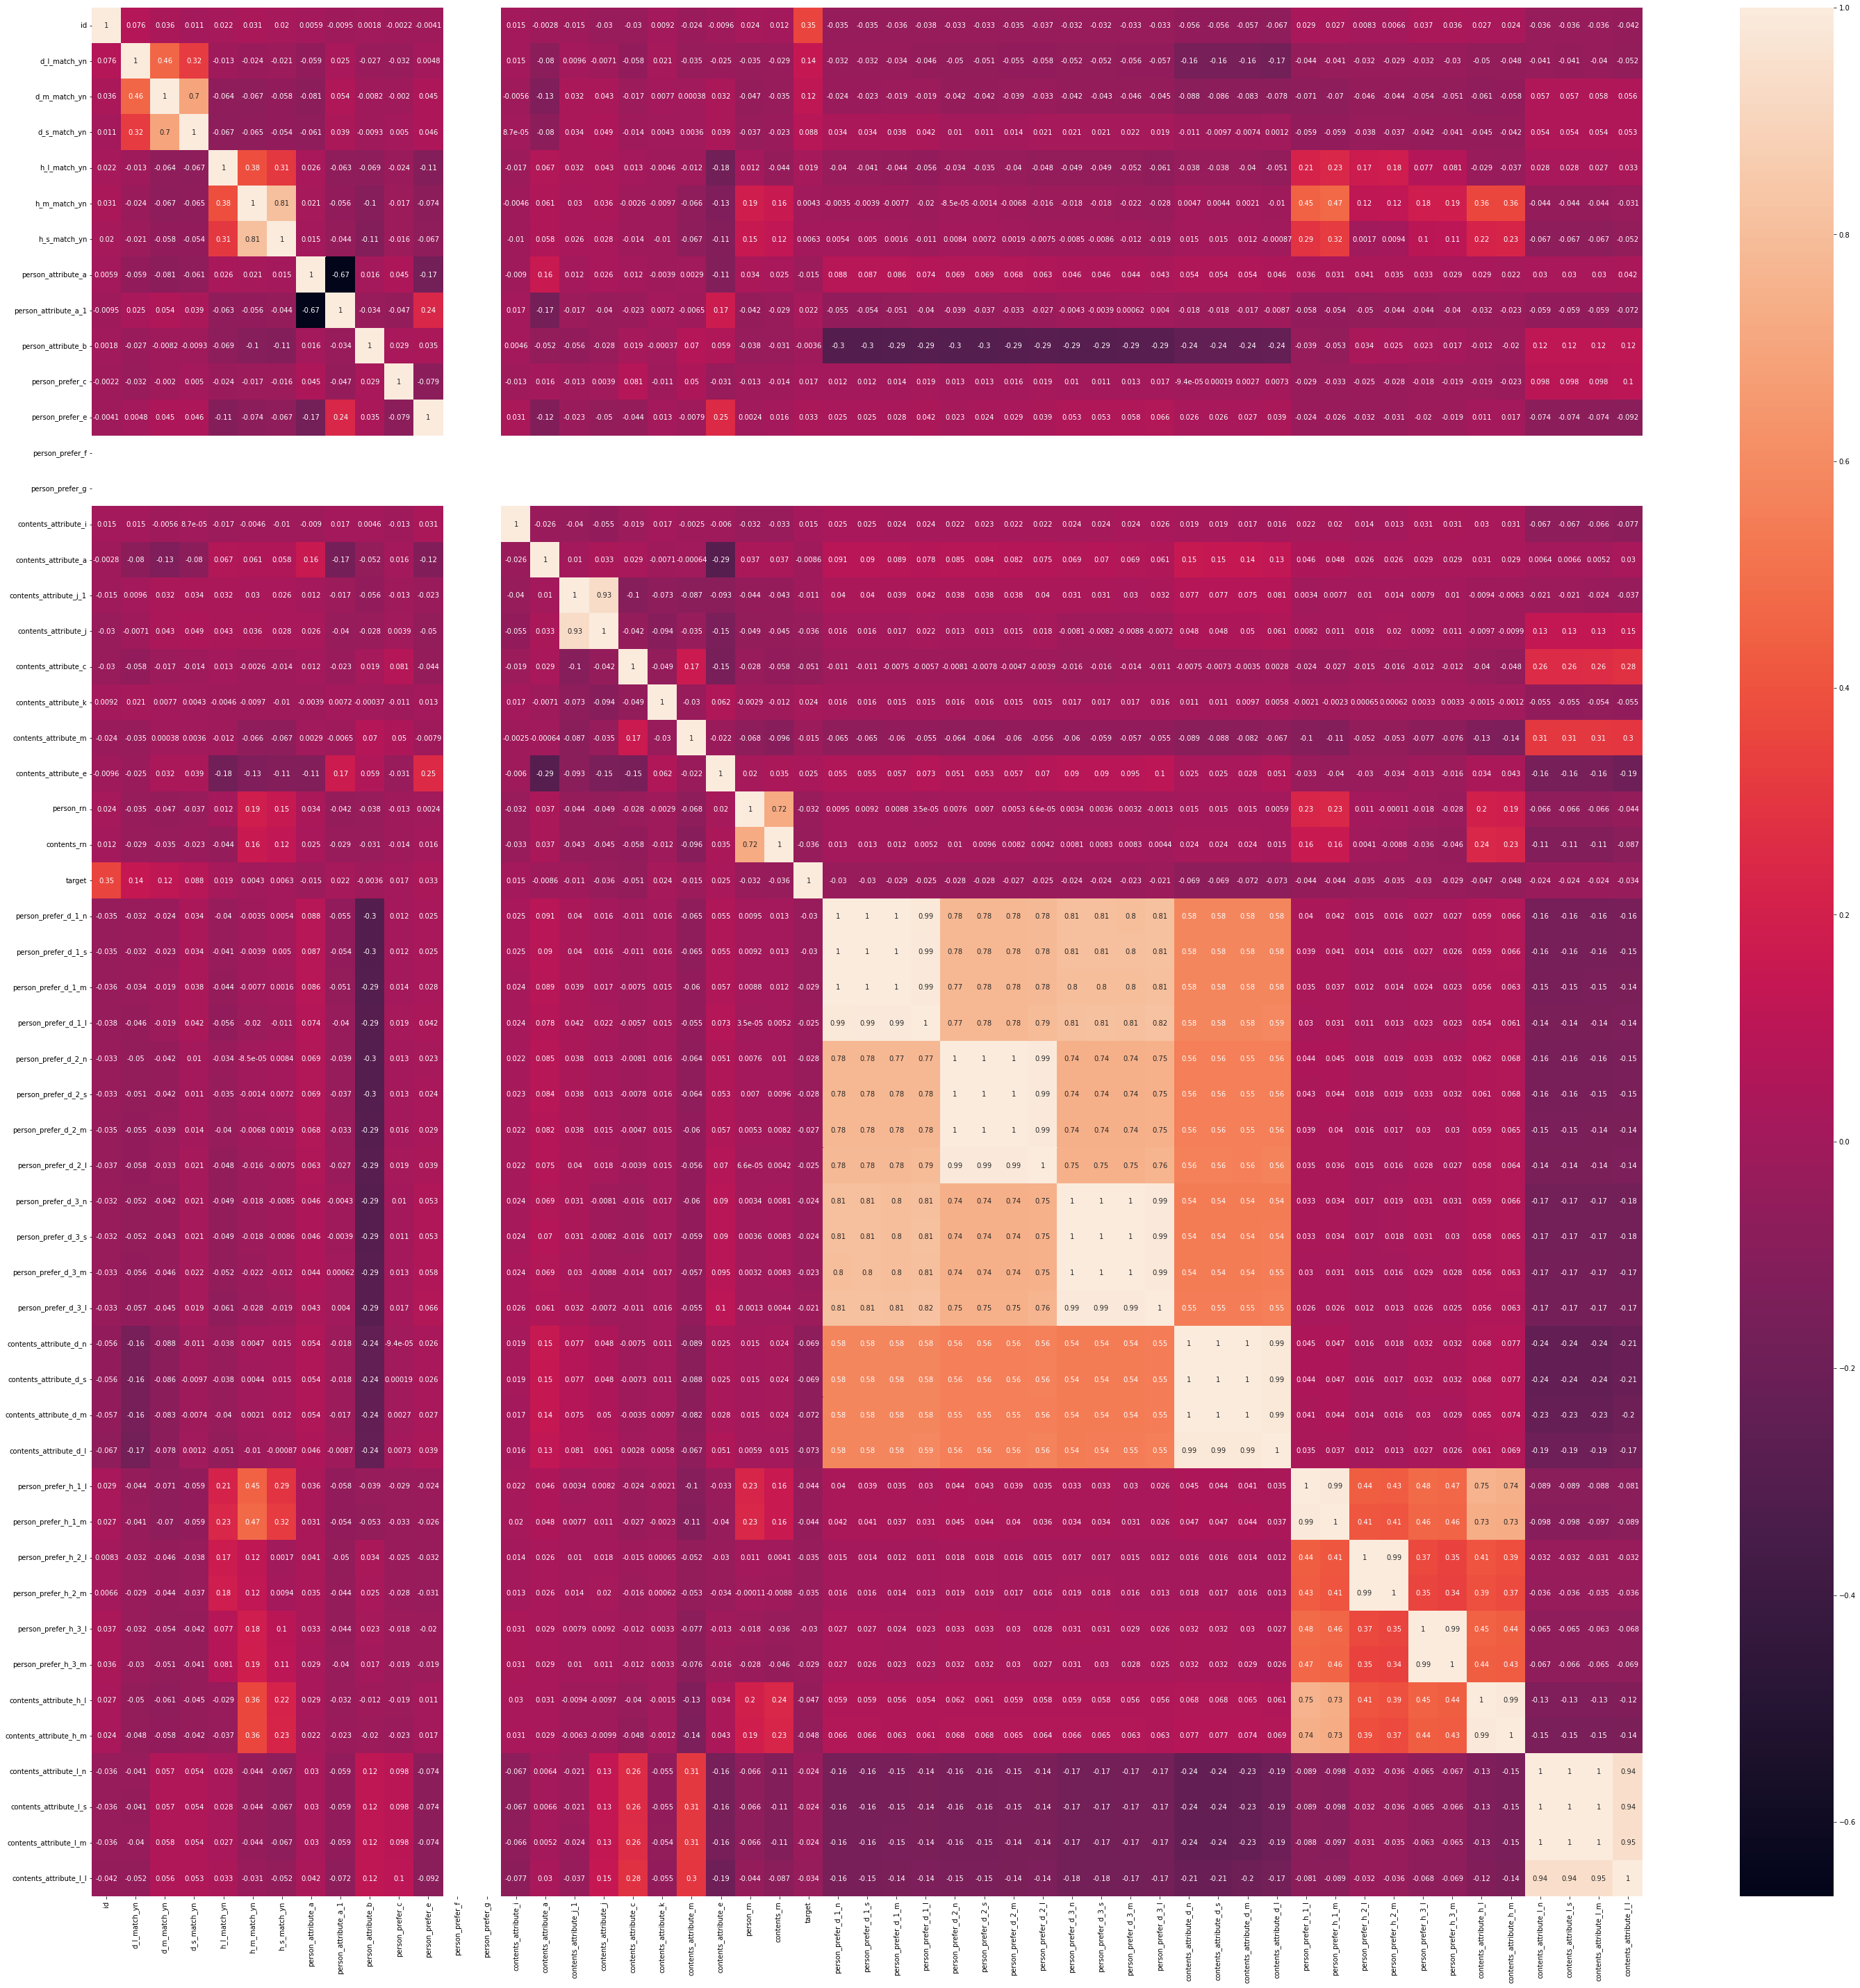

In [ ]:
plt.figure(figsize = (50, 50))
sns.heatmap(train_data.corr(), annot = True)

# 각 속성별 분포를 알아보자

## 회원 A 속성

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

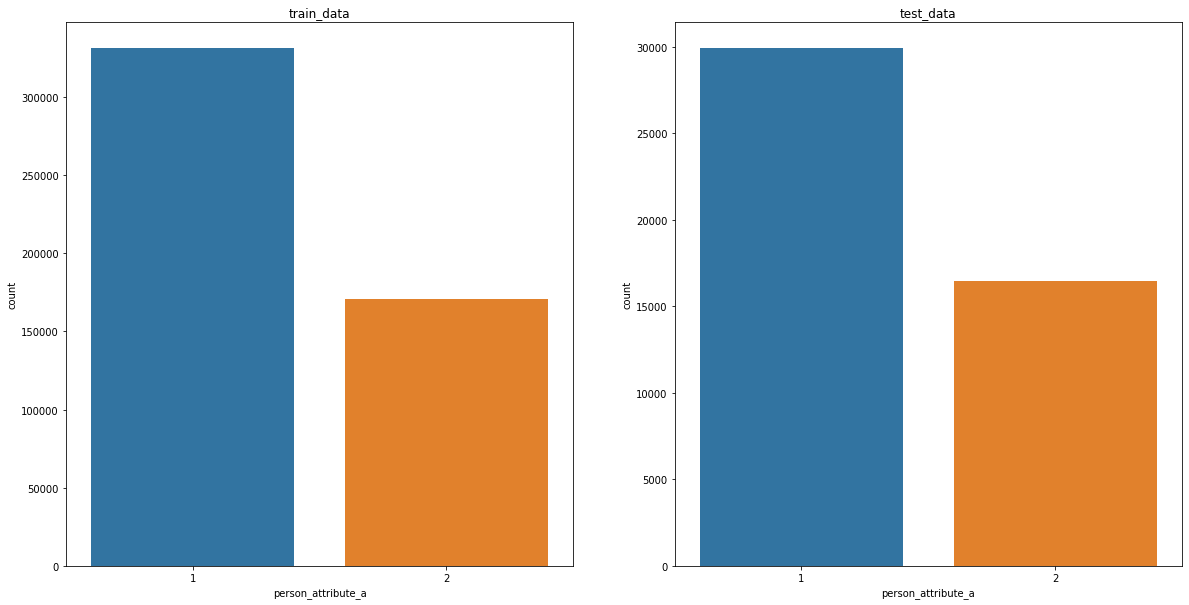

In [ ]:
# person_attribute_a
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_attribute_a'], ax = ax[0])
sns.countplot(test_data['person_attribute_a'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

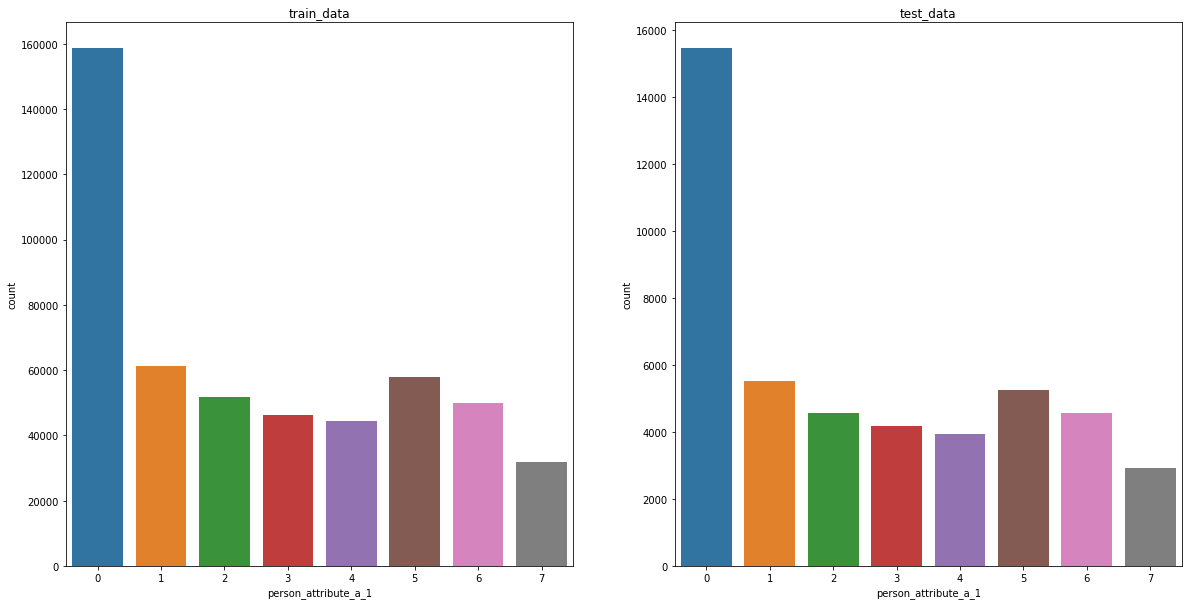

In [ ]:
# person_attribute_a_1
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_attribute_a_1'], ax = ax[0])
sns.countplot(test_data['person_attribute_a_1'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

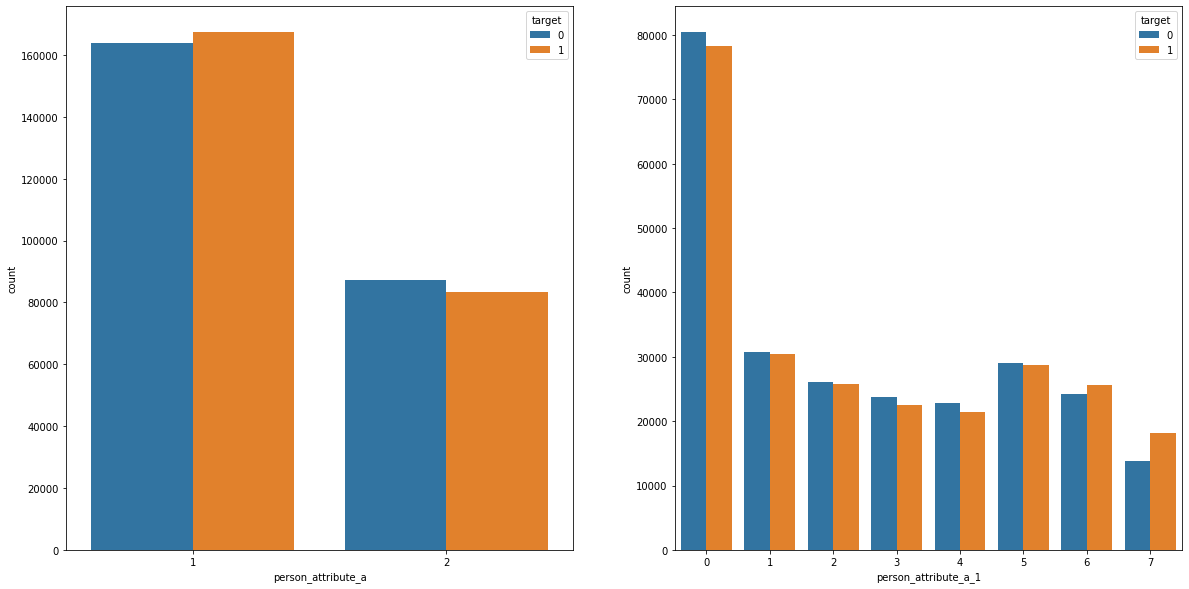

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_attribute_a', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_attribute_a_1', hue = 'target', ax = ax[1])

## 회원 B 속성

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

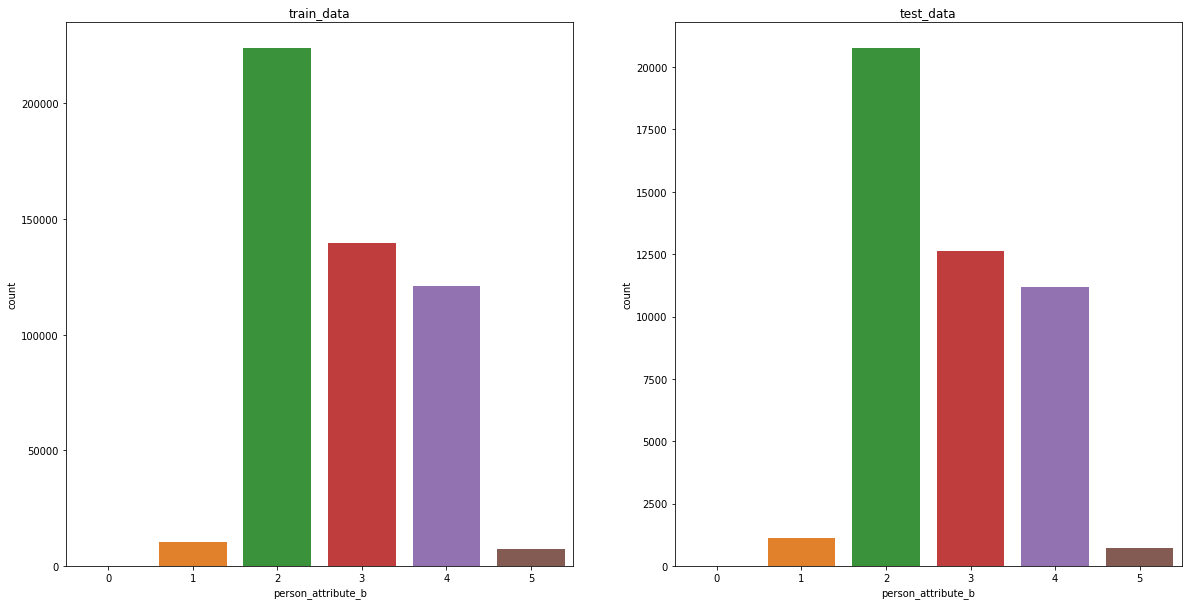

In [ ]:
# person_attribute_b
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_attribute_b'], ax = ax[0])
sns.countplot(test_data['person_attribute_b'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

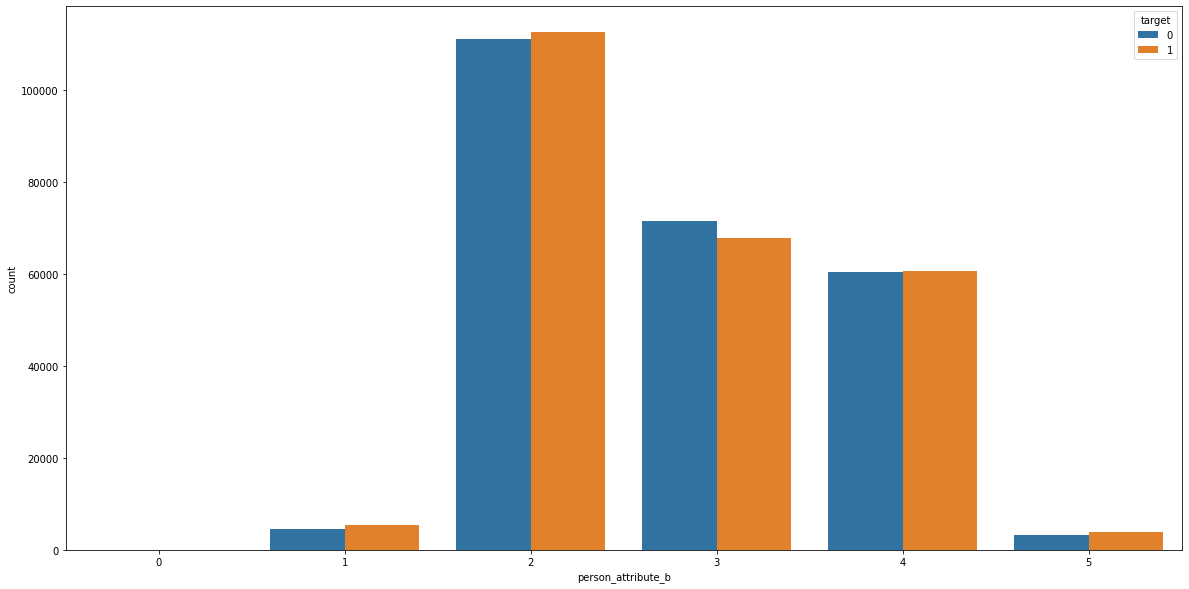

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_attribute_b', hue = 'target')

## 회원 선호 속성 C

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

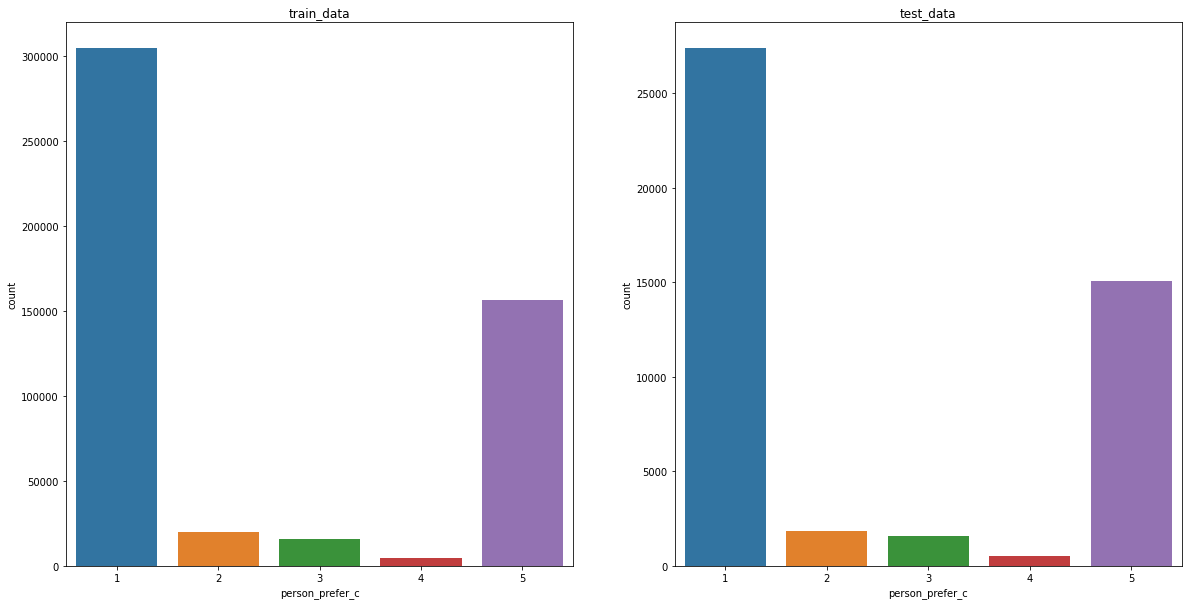

In [ ]:
# person_prefer_c
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_c'], ax = ax[0])
sns.countplot(test_data['person_prefer_c'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

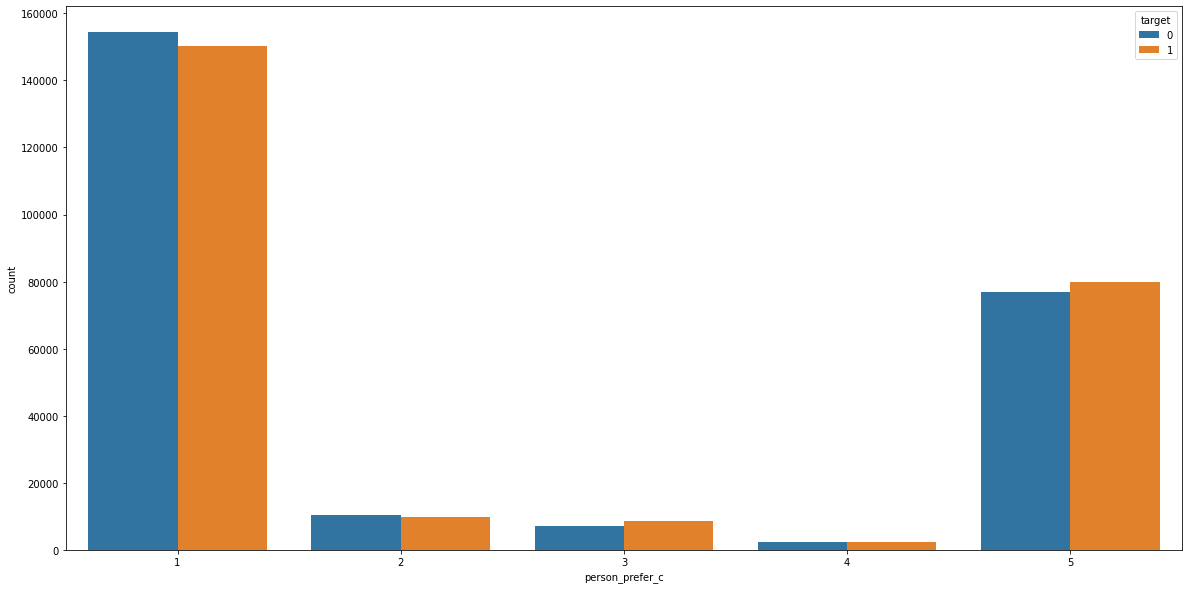

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_c', hue = 'target')

## 회원 선호 속성 D

train에는 있고 test에는 없는 데이터들이 있다(이러한 부분들은 어떻게 해야 될지 생각을 해보자)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

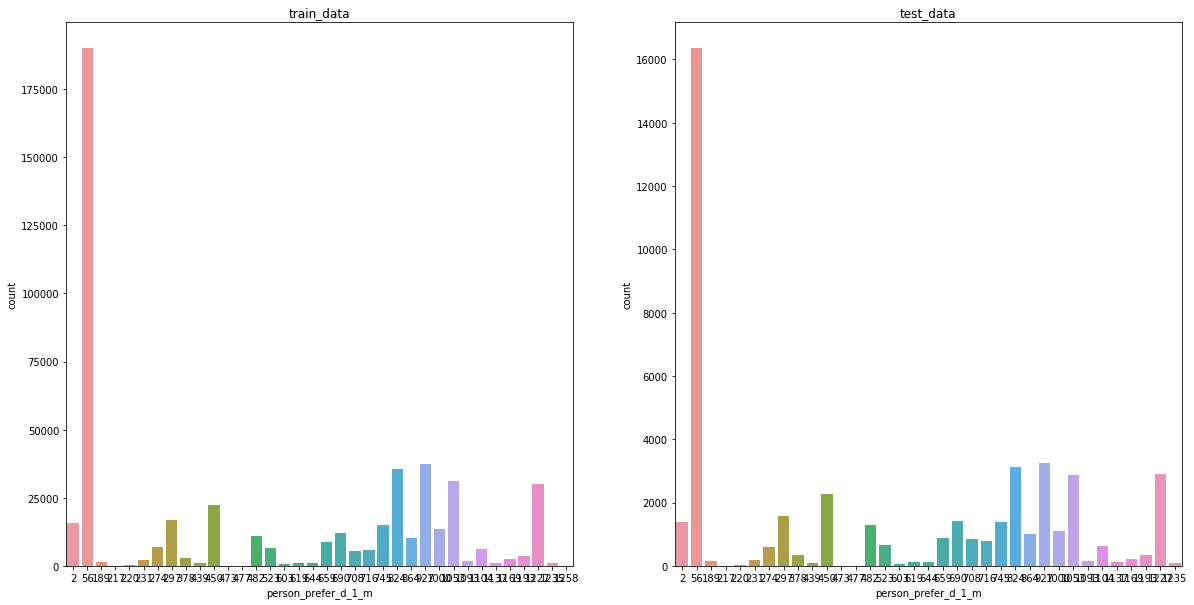

In [ ]:
# person_prefer_d_1_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_1_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_1_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

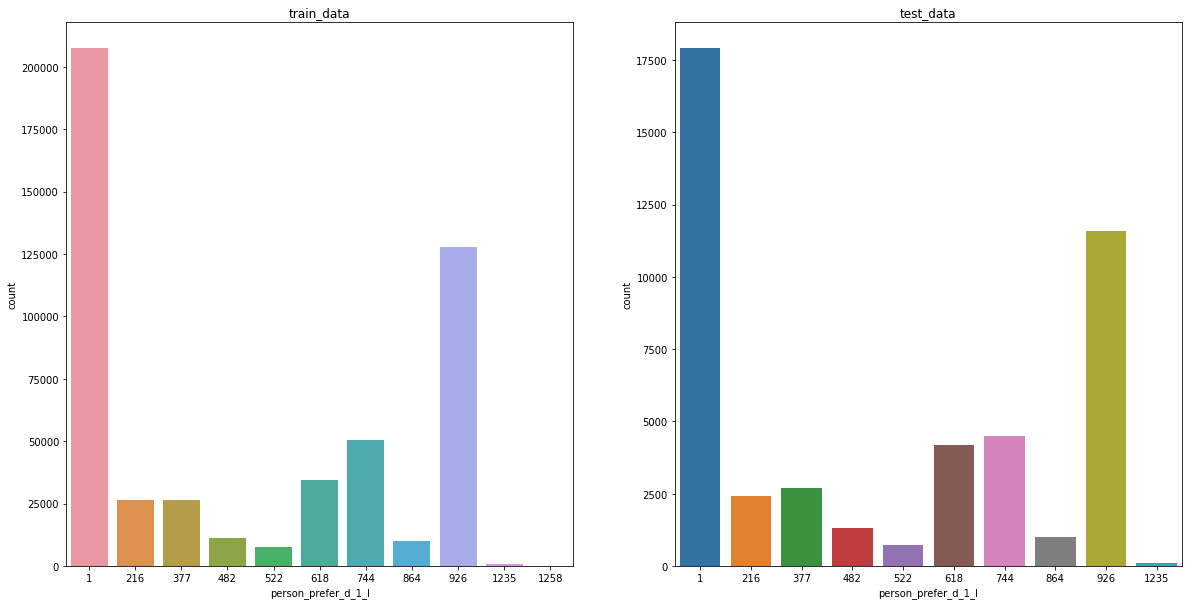

In [ ]:
# person_prefer_d_1_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_1_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_1_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

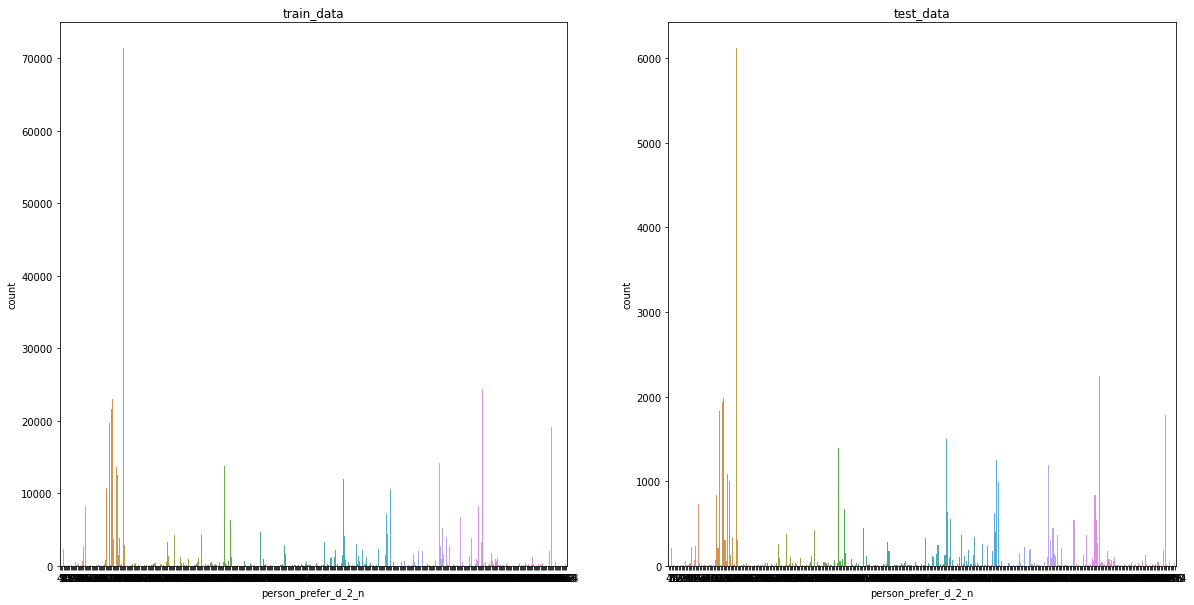

In [ ]:
# person_prefer_d_2_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_n'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

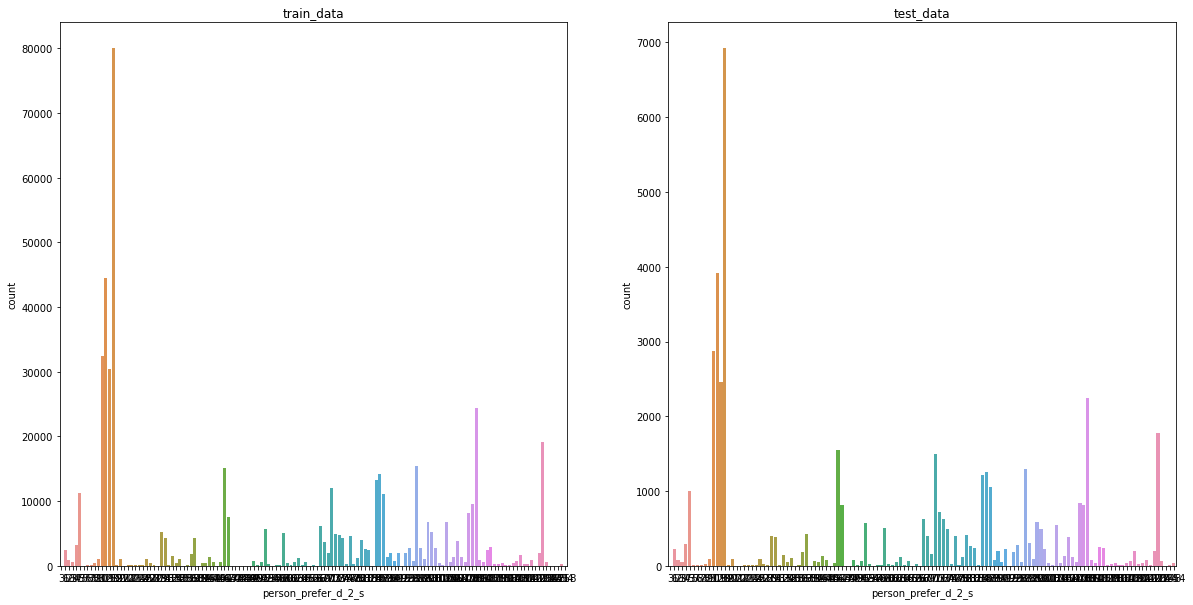

In [ ]:
# person_prefer_d_2_s
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_s'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_s'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

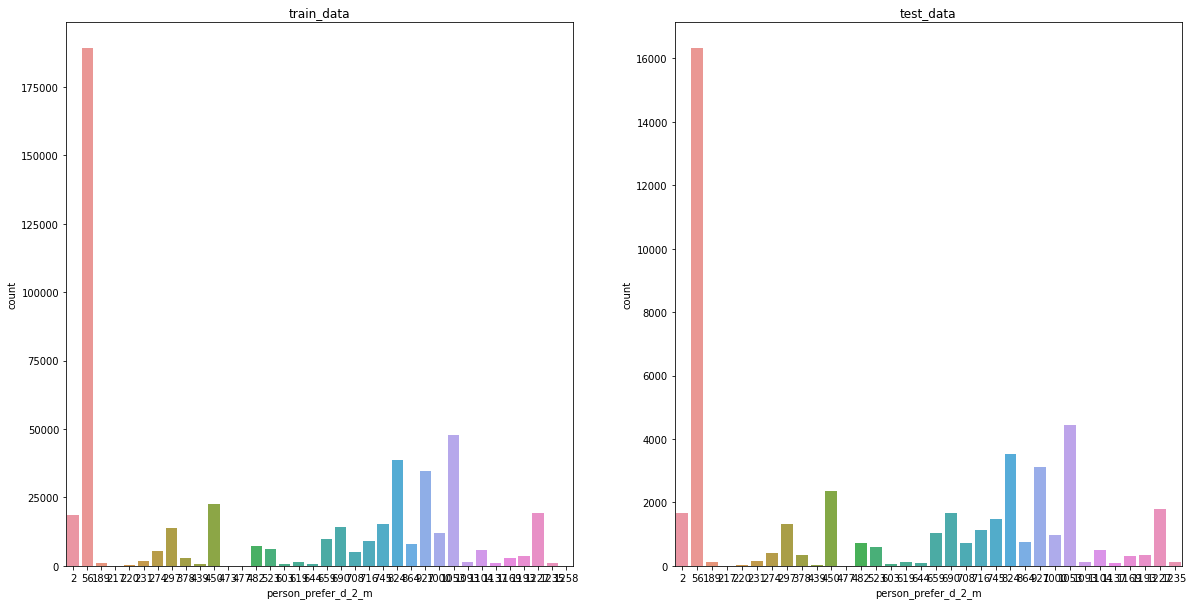

In [ ]:
# person_prefer_d_2_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

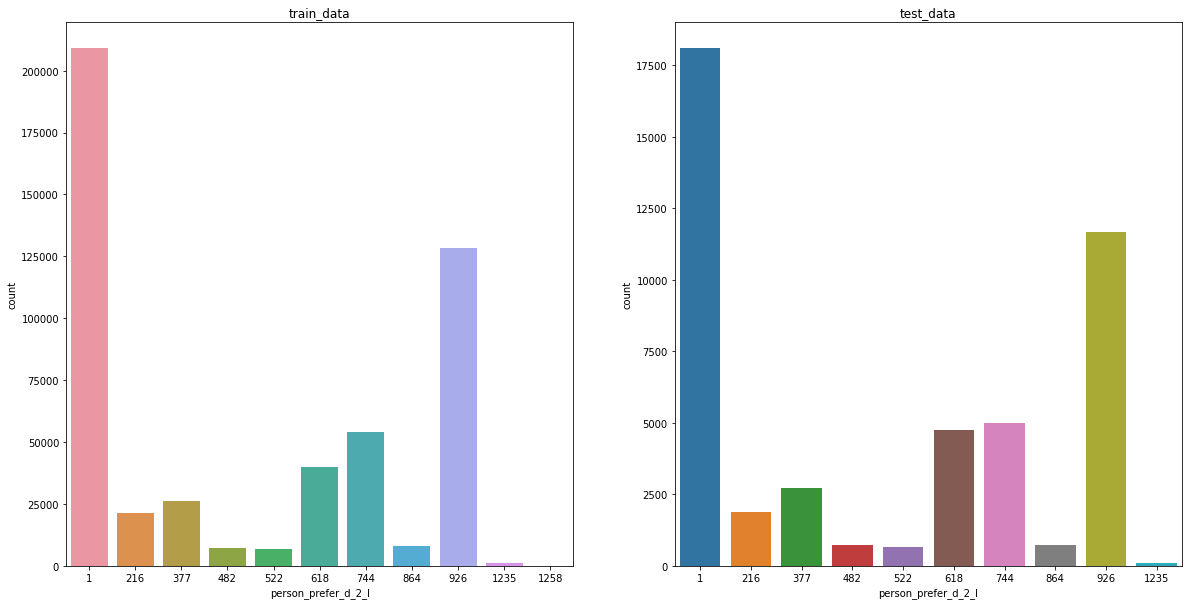

In [ ]:
# person_prefer_d_2_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

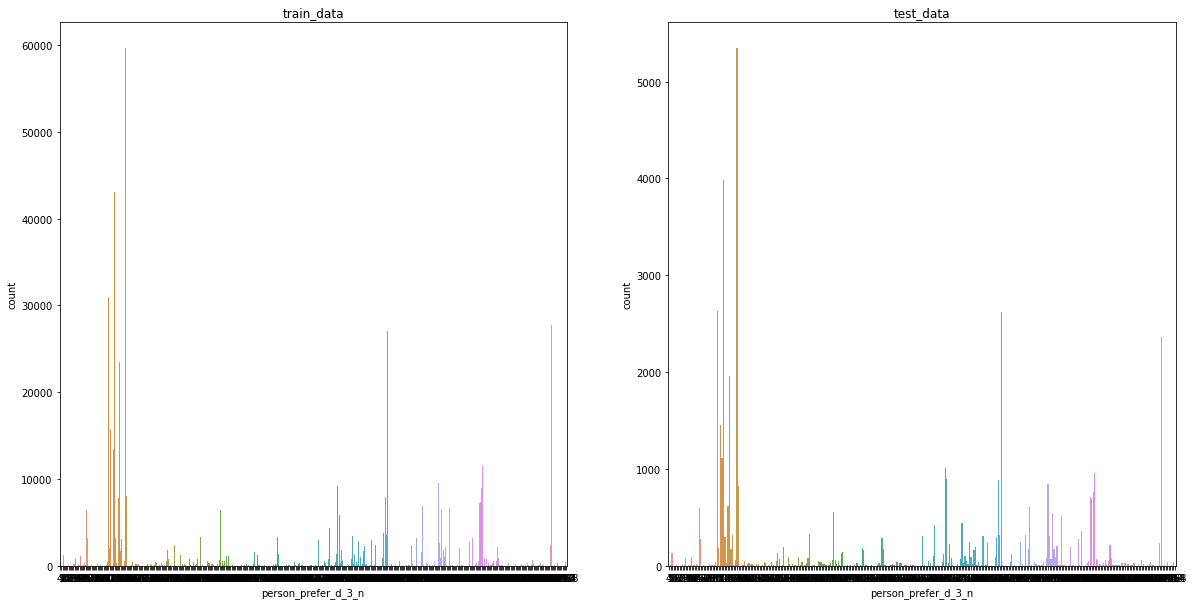

In [ ]:
# person_prefer_d_3_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_n'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

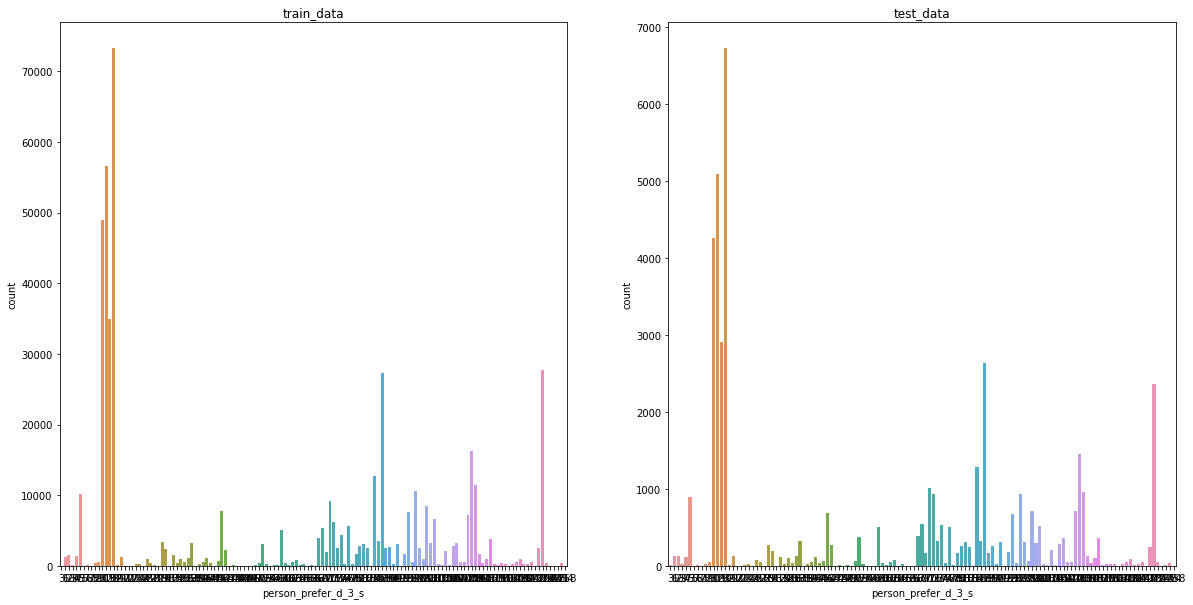

In [ ]:
# person_prefer_d_3_s
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_s'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_s'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

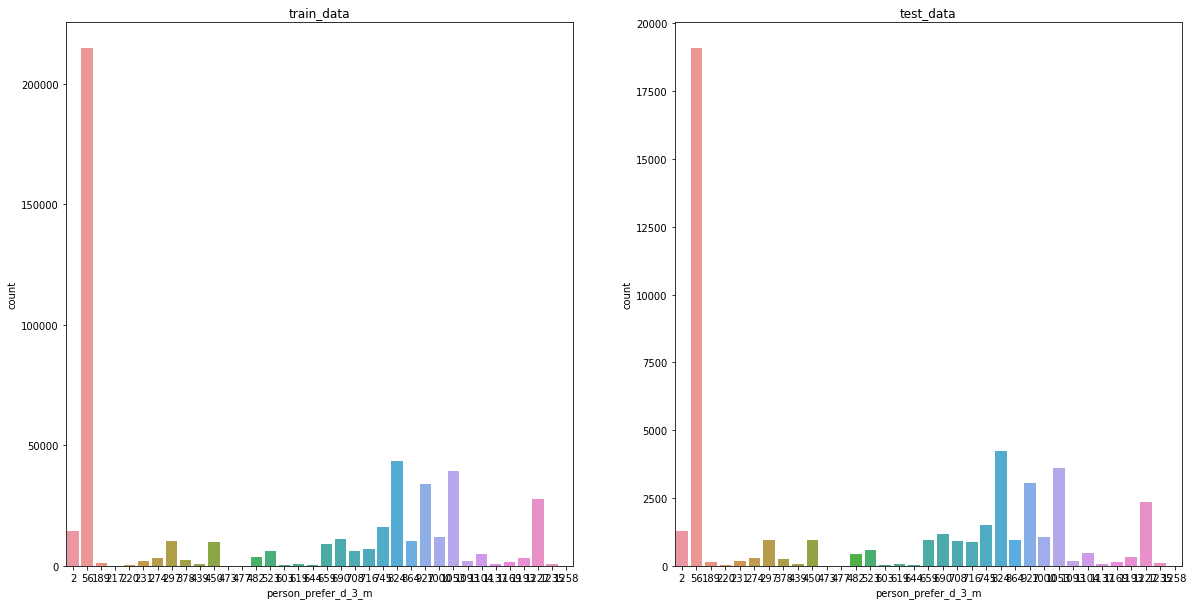

In [ ]:
# person_prefer_d_3_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

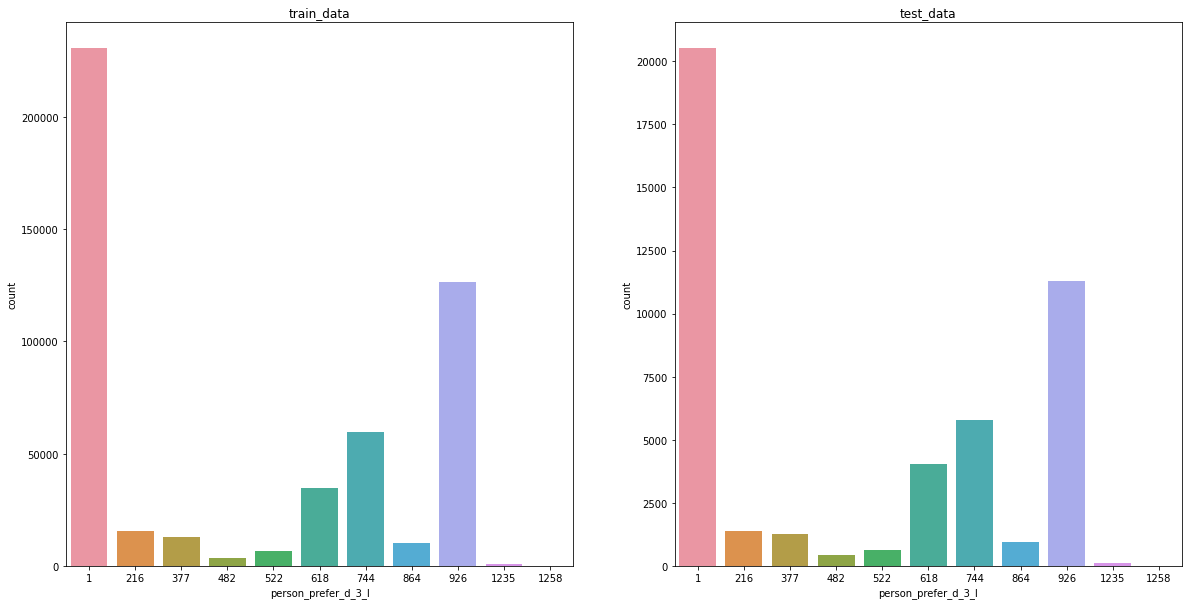

In [ ]:
# person_prefer_d_3_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

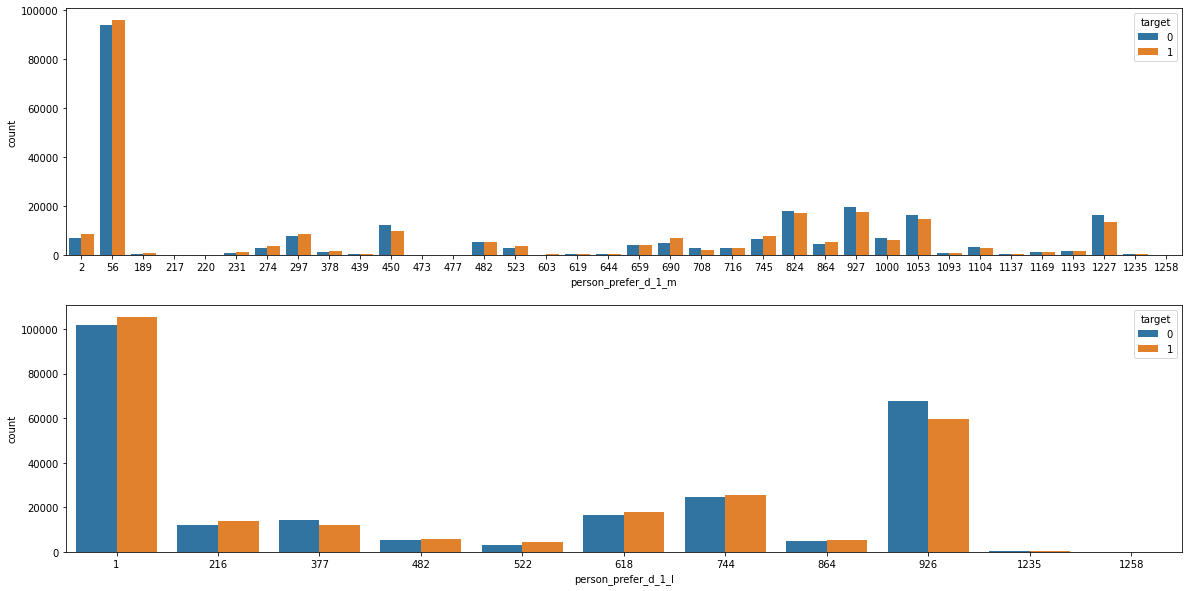

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_d_1_m', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_d_1_l', hue = 'target', ax = ax[1])

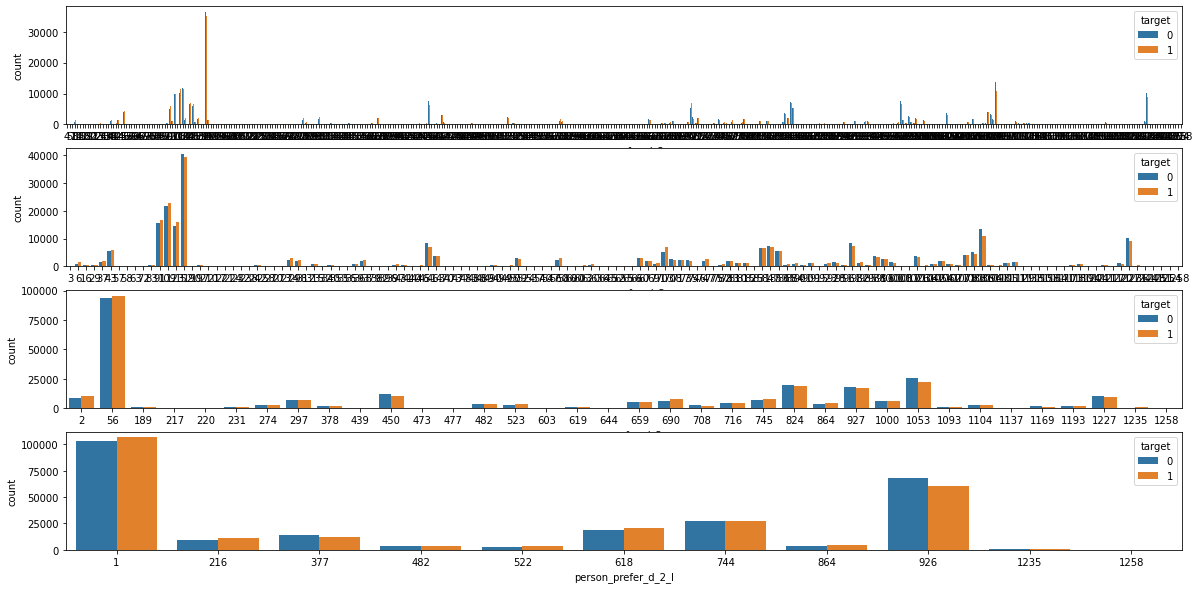

In [ ]:
fig, ax = plt.subplots(nrows = 4, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_d_2_n', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_d_2_s', hue = 'target', ax = ax[1])
sns.countplot(data = train_data, x = 'person_prefer_d_2_m', hue = 'target', ax = ax[2])
sns.countplot(data = train_data, x = 'person_prefer_d_2_l', hue = 'target', ax = ax[3])

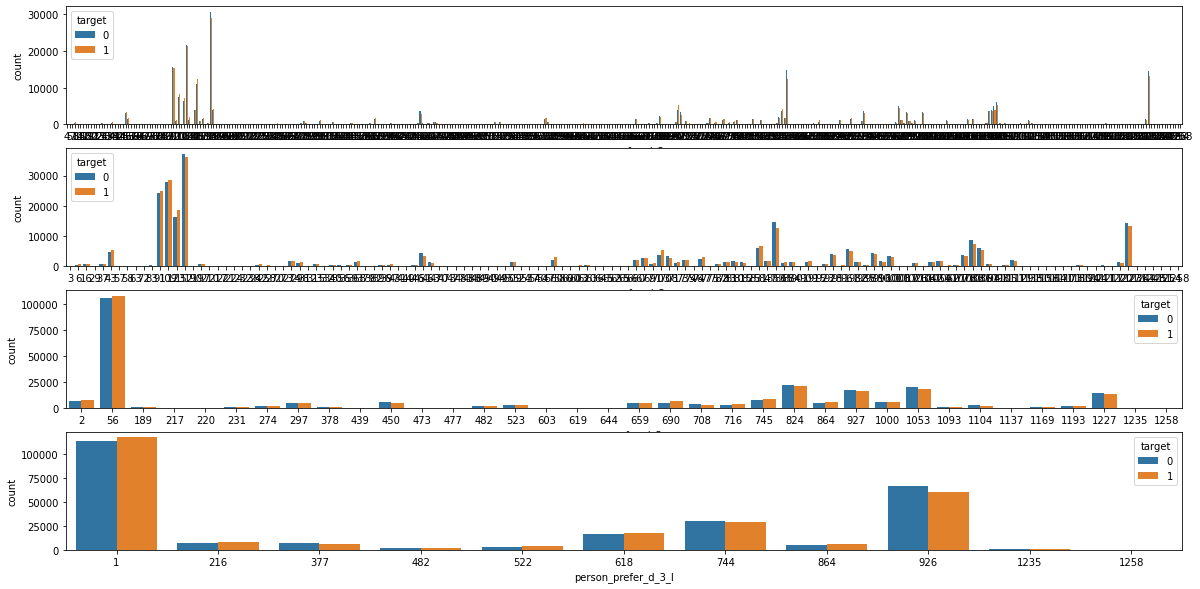

In [ ]:
fig, ax = plt.subplots(nrows = 4, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_d_3_n', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_d_3_s', hue = 'target', ax = ax[1])
sns.countplot(data = train_data, x = 'person_prefer_d_3_m', hue = 'target', ax = ax[2])
sns.countplot(data = train_data, x = 'person_prefer_d_3_l', hue = 'target', ax = ax[3])

## 회원 선호 속성 E

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

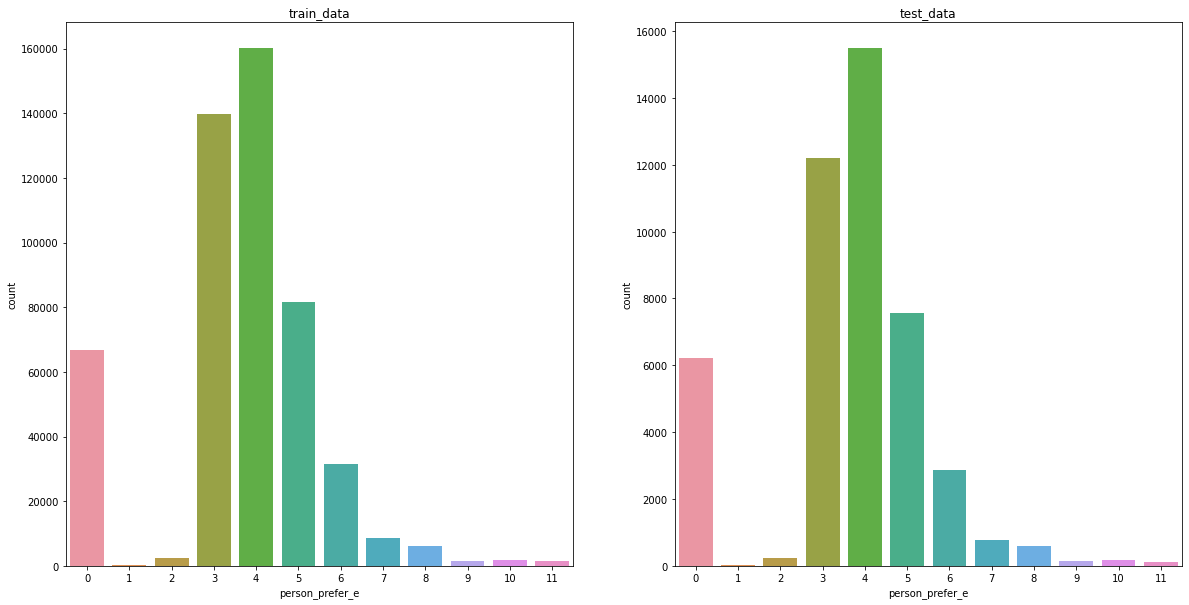

In [ ]:
# person_prefer_e
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_e'], ax = ax[0])
sns.countplot(test_data['person_prefer_e'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

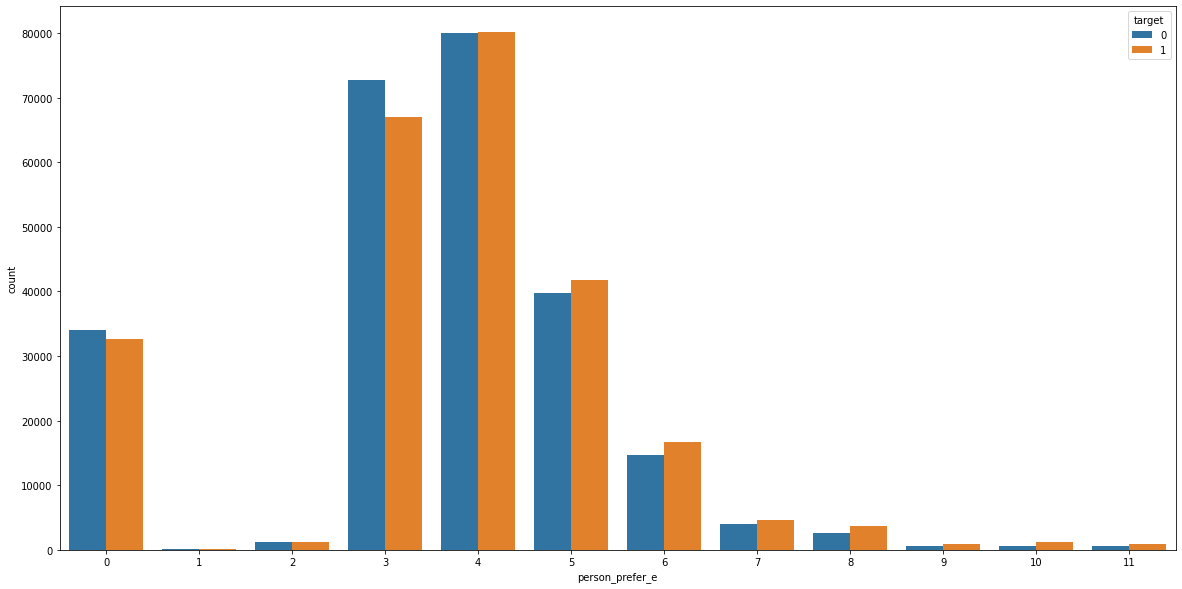

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_e', hue = 'target')


## 회원 선호 속성 F

의미가 크지 않을 거 같다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

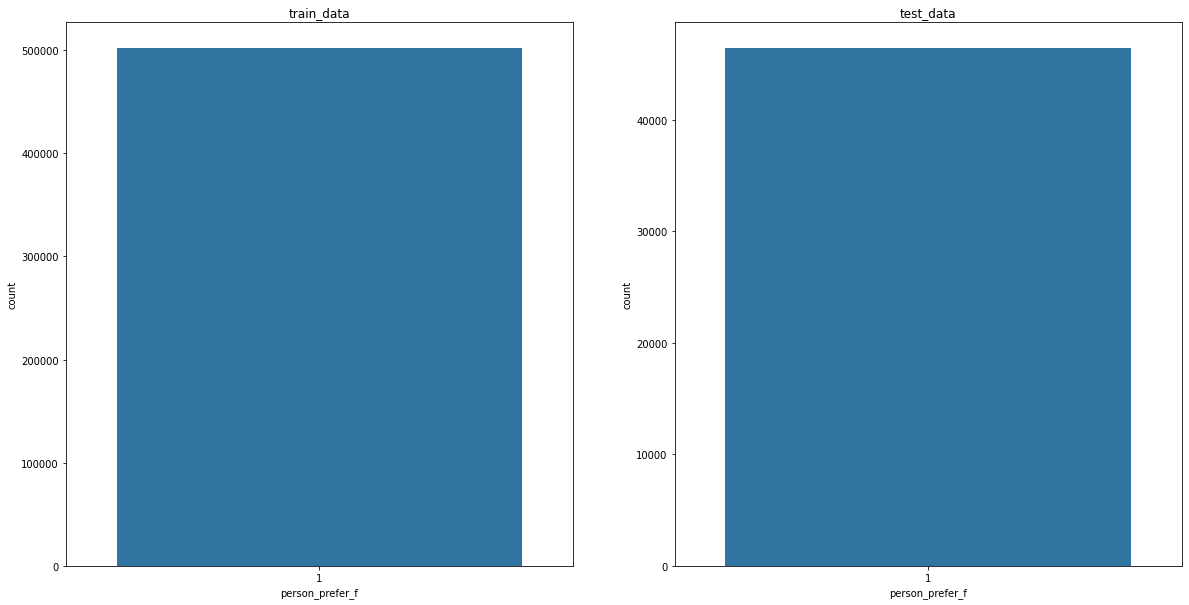

In [ ]:
# person_prefer_f
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_f'], ax = ax[0])
sns.countplot(test_data['person_prefer_f'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

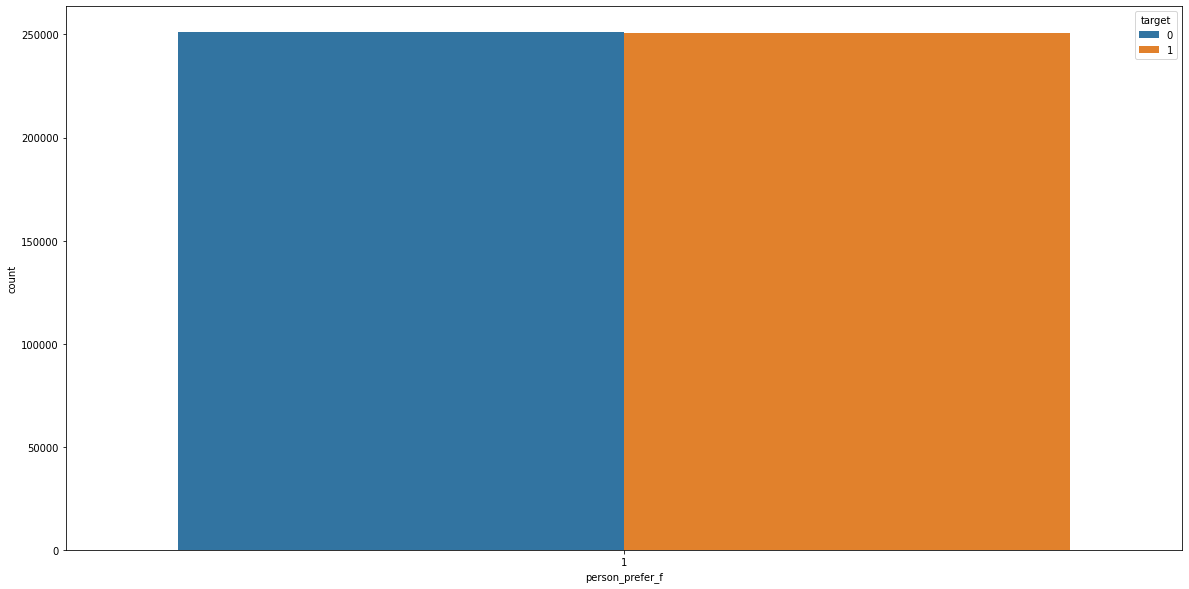

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_f', hue = 'target')

## 회원 선호 속성 G

의미가 크지 않을거 같다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

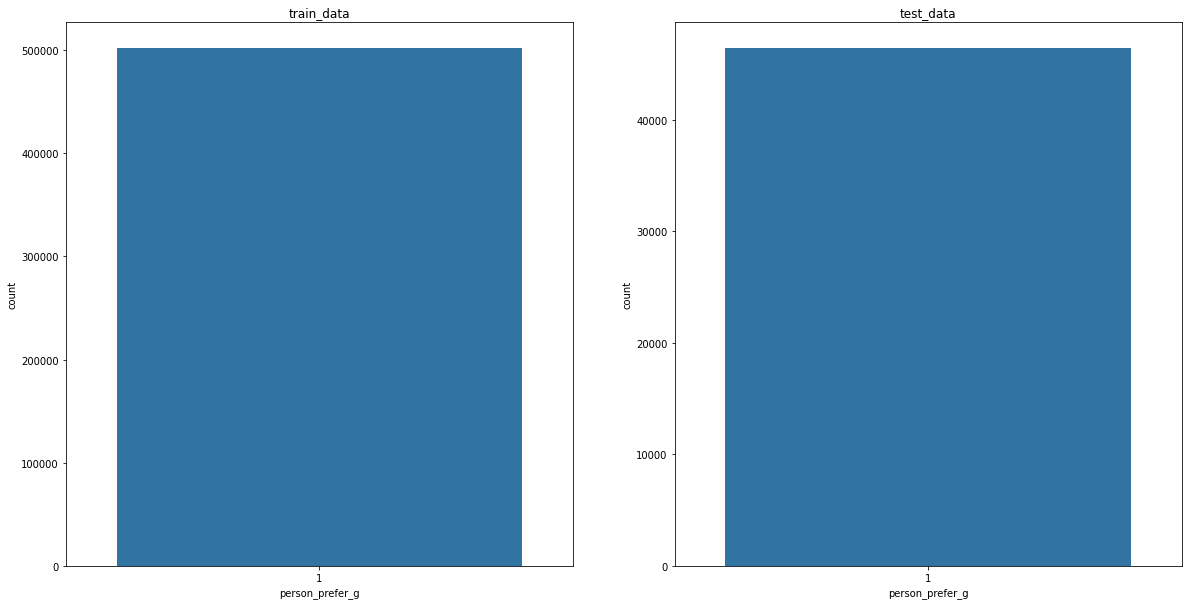

In [ ]:
# person_prefer_g
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_g'], ax = ax[0])
sns.countplot(test_data['person_prefer_g'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

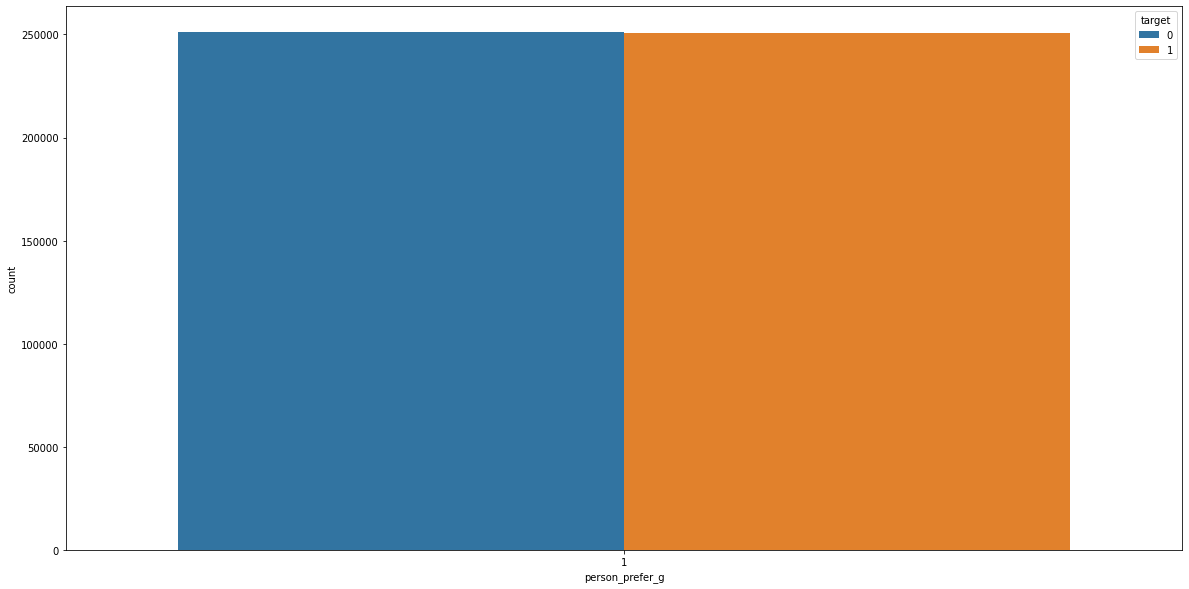

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_g', hue = 'target')

## 회원 선호 속성 H

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

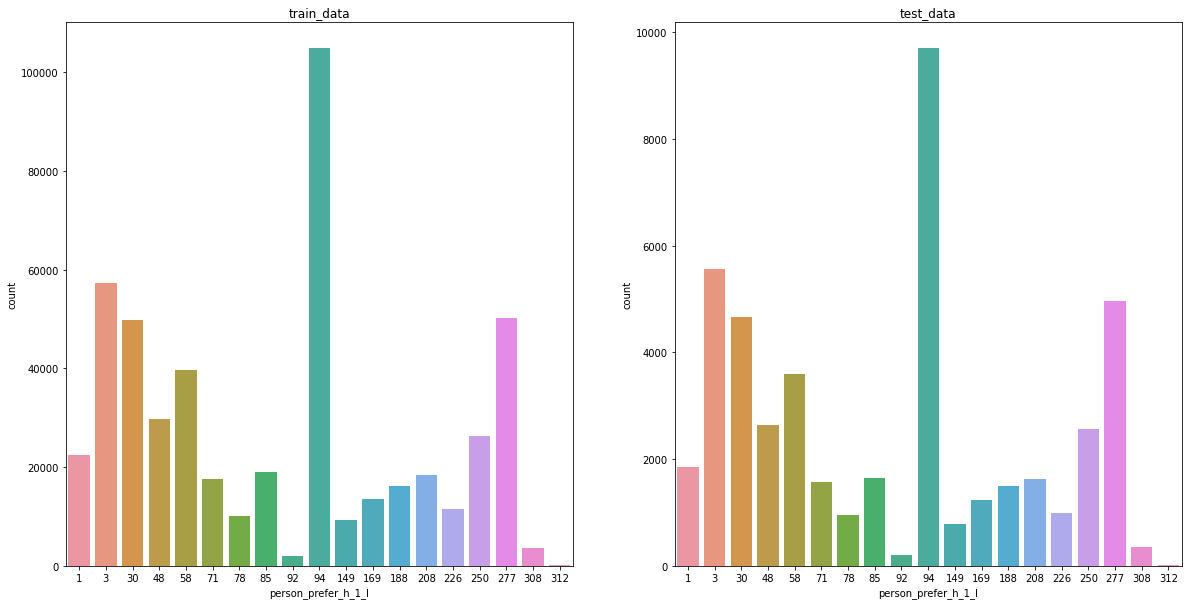

In [ ]:
# person_prefer_h_1_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_1_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_1_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

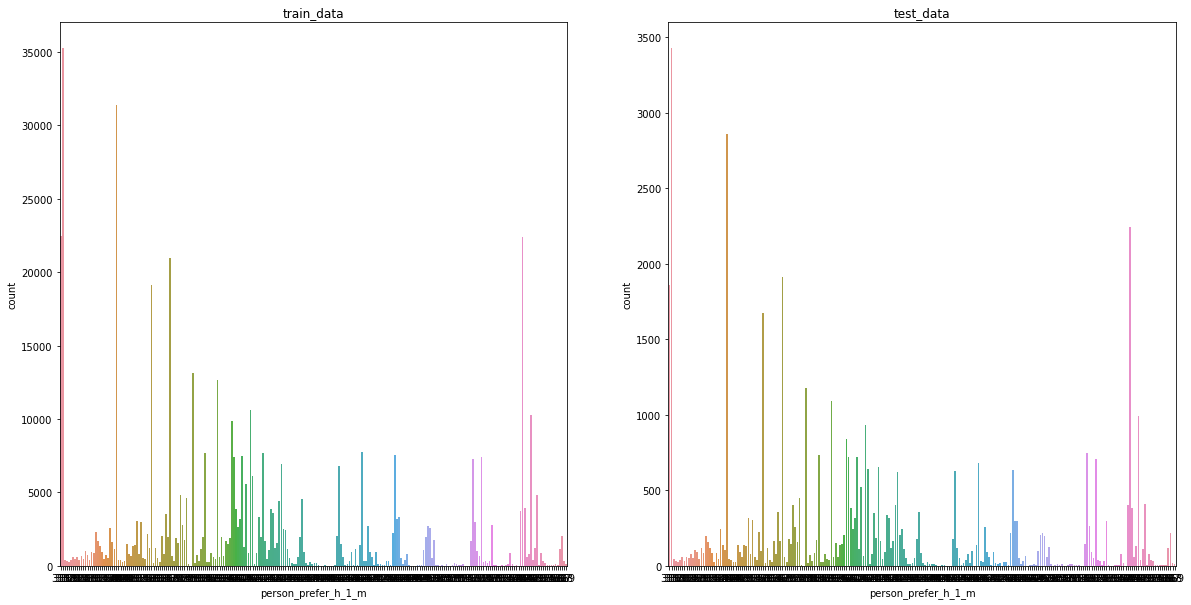

In [ ]:
# person_prefer_h_1_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_1_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_1_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

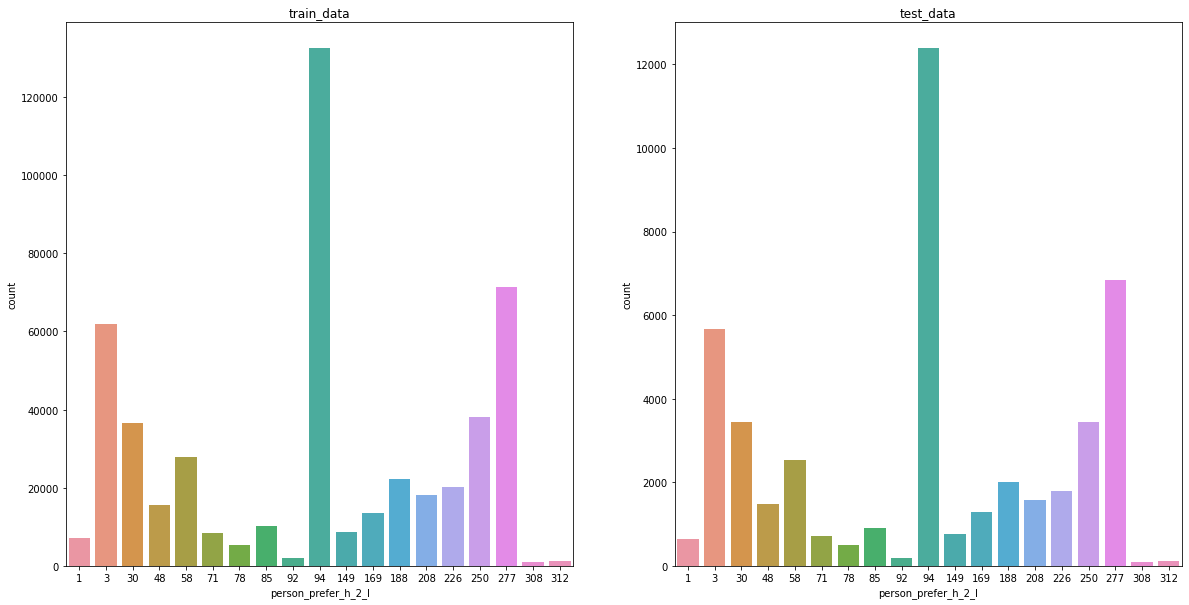

In [ ]:
# person_prefer_h_2_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_2_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_2_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

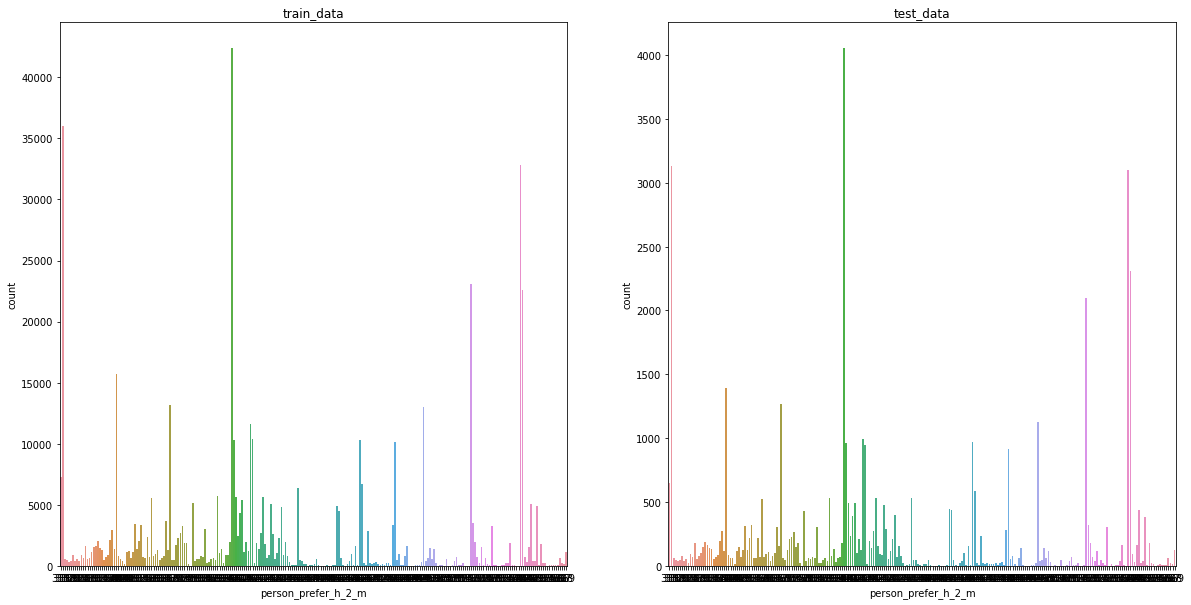

In [ ]:
# person_prefer_h_2_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_2_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_2_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

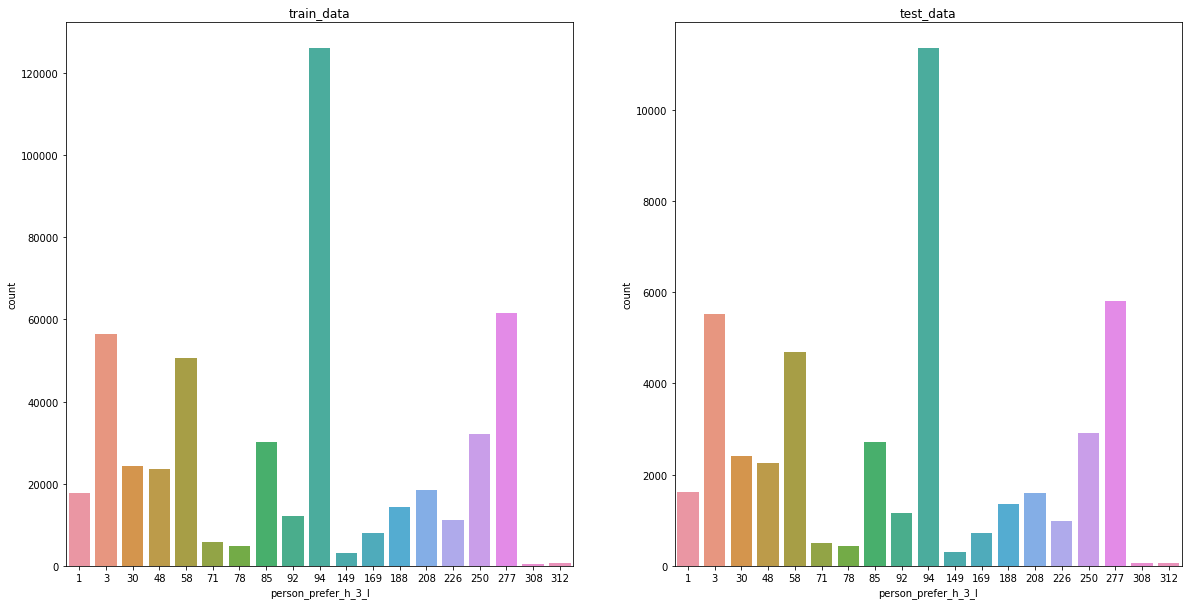

In [ ]:
# person_prefer_h_3_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_3_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_3_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

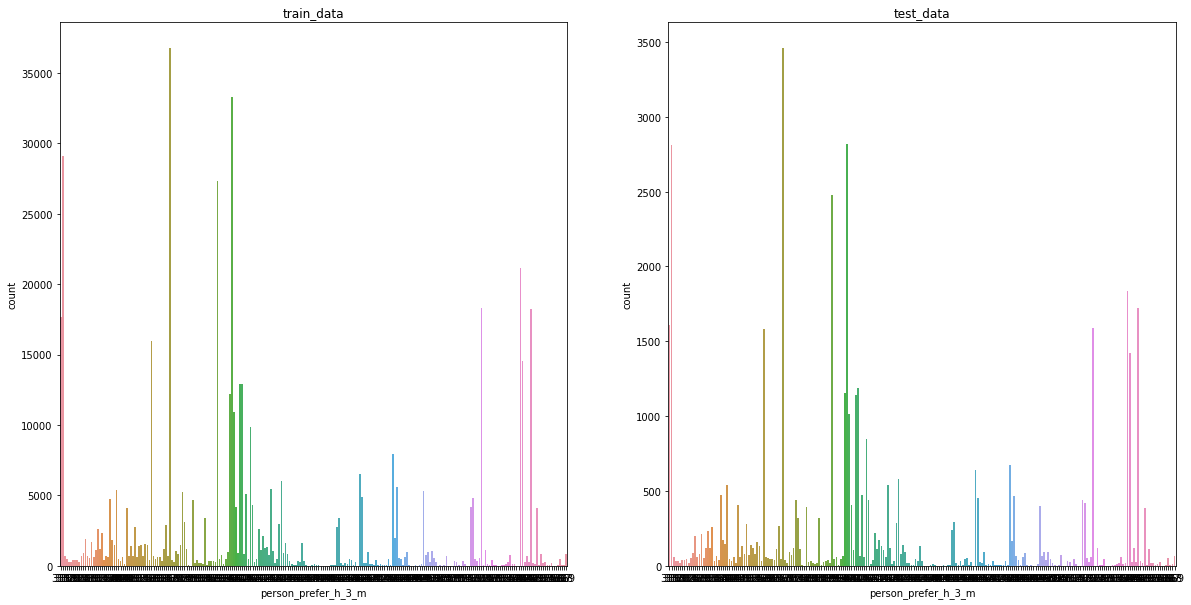

In [ ]:
# person_prefer_h_3_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_3_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_3_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

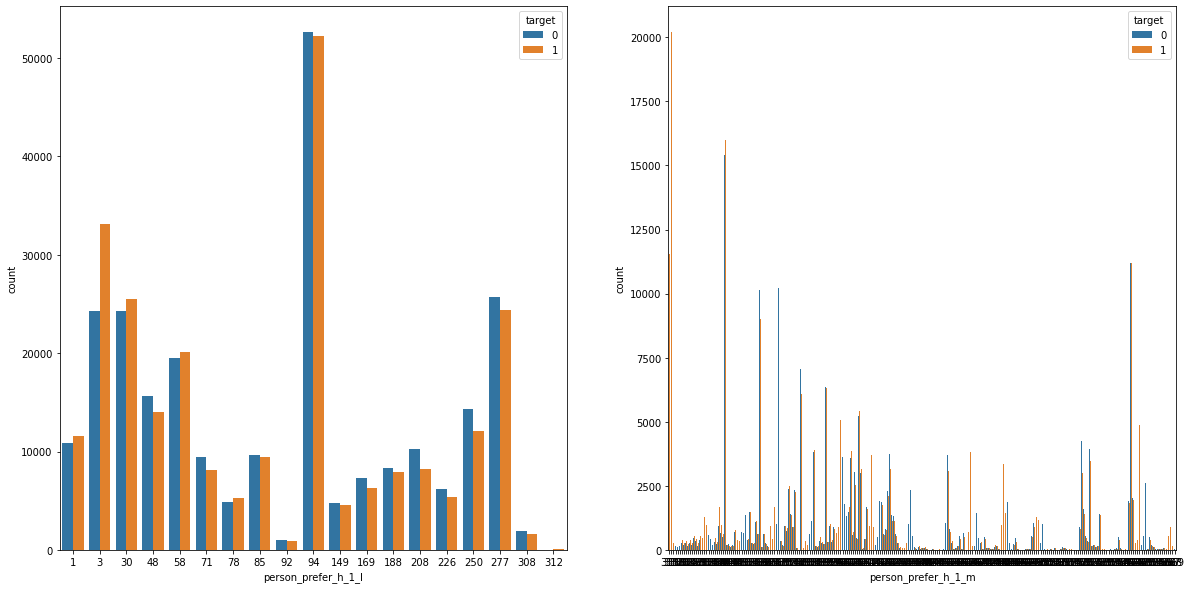

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_h_1_l', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_h_1_m', hue = 'target', ax = ax[1])

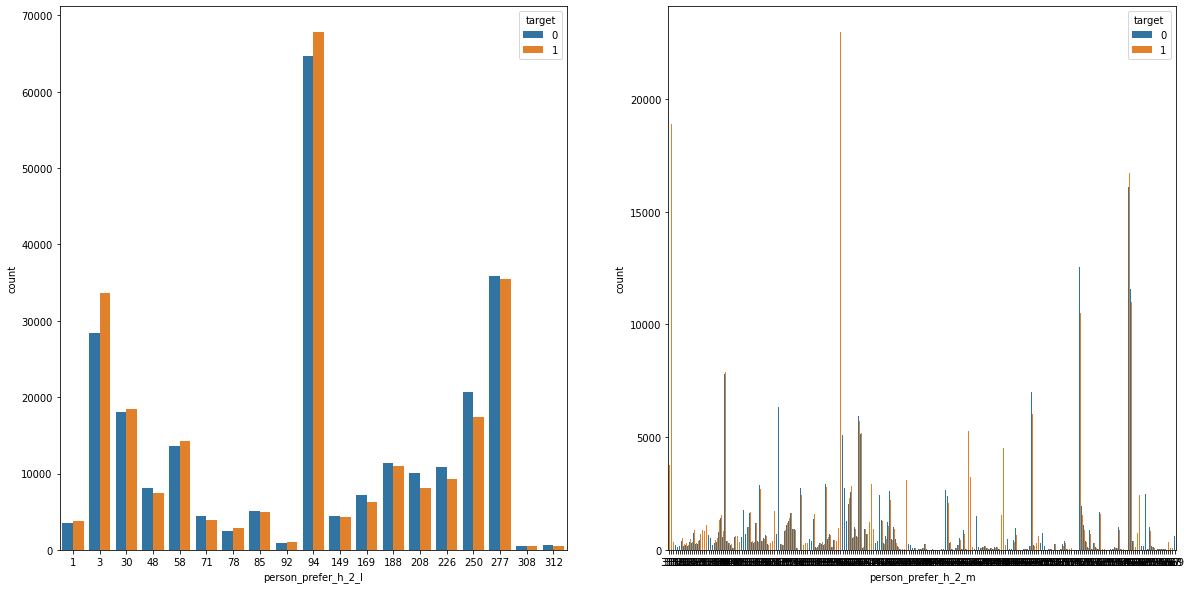

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_h_2_l', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_h_2_m', hue = 'target', ax = ax[1])

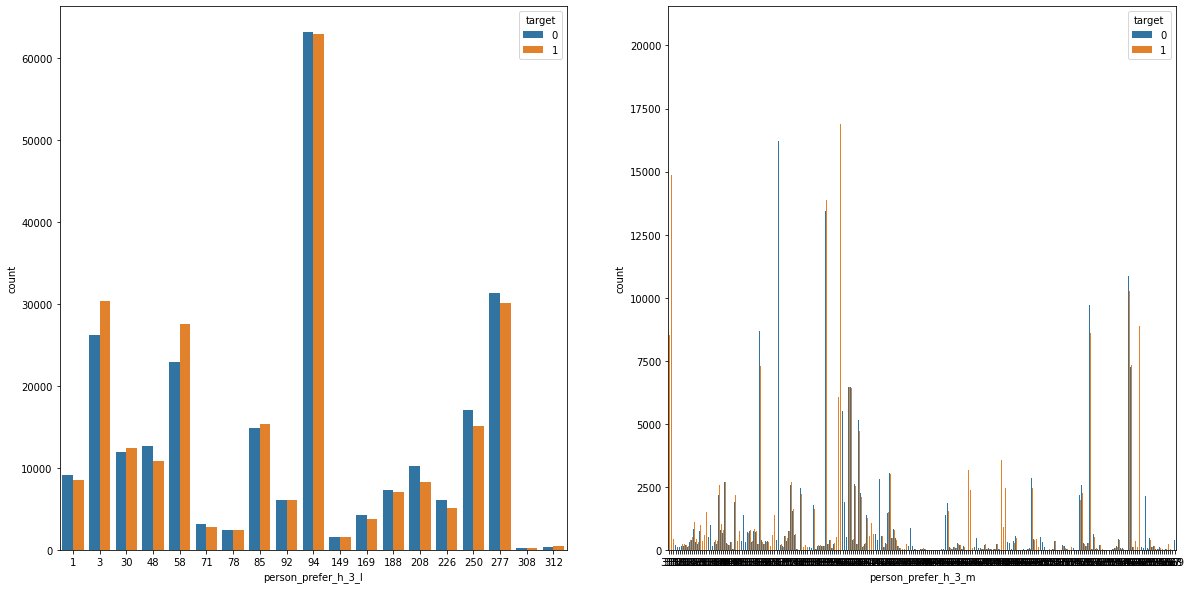

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_h_3_l', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_h_3_m', hue = 'target', ax = ax[1])

## 컨텐츠 속성 I

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

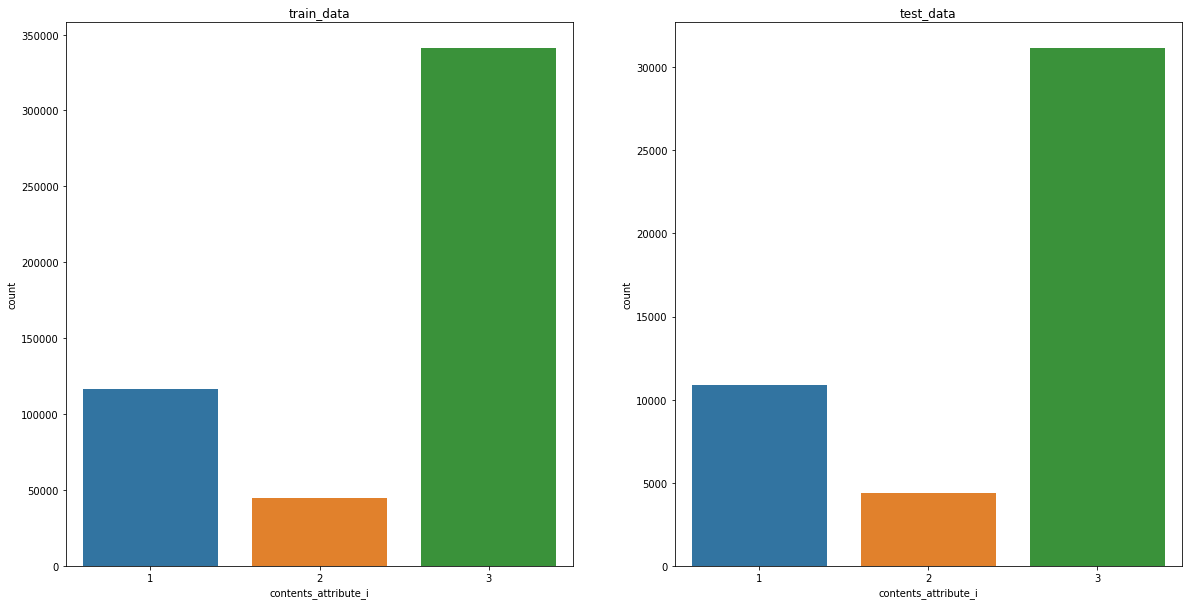

In [ ]:
# contents_attribute_i
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_i'], ax = ax[0])
sns.countplot(test_data['contents_attribute_i'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

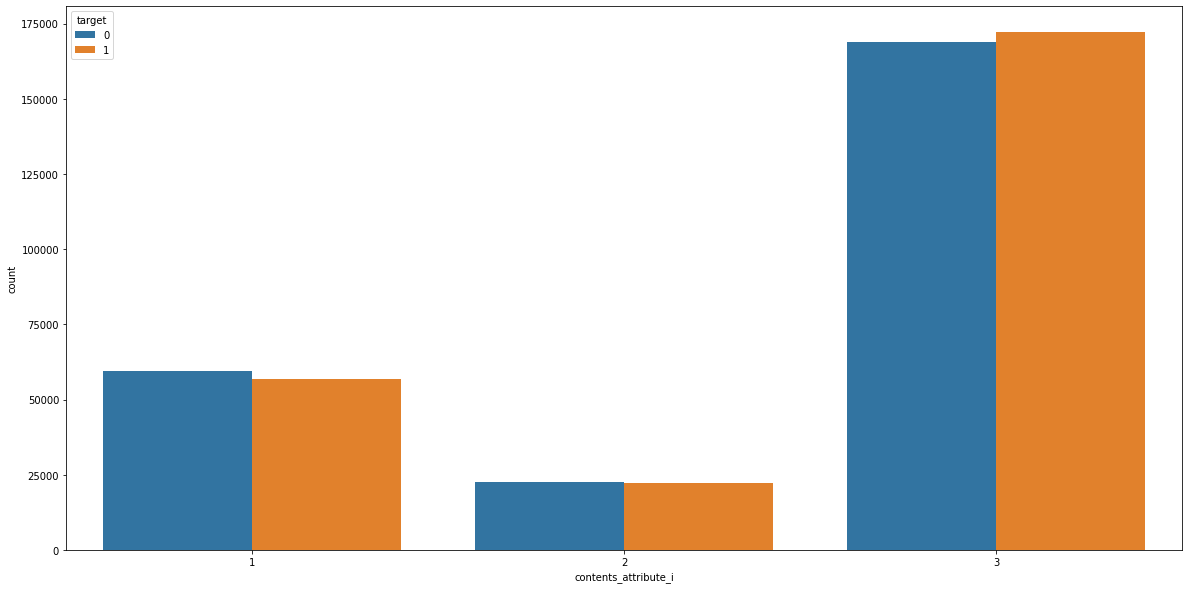

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_i', hue = 'target')

## 컨텐츠 속성 A

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

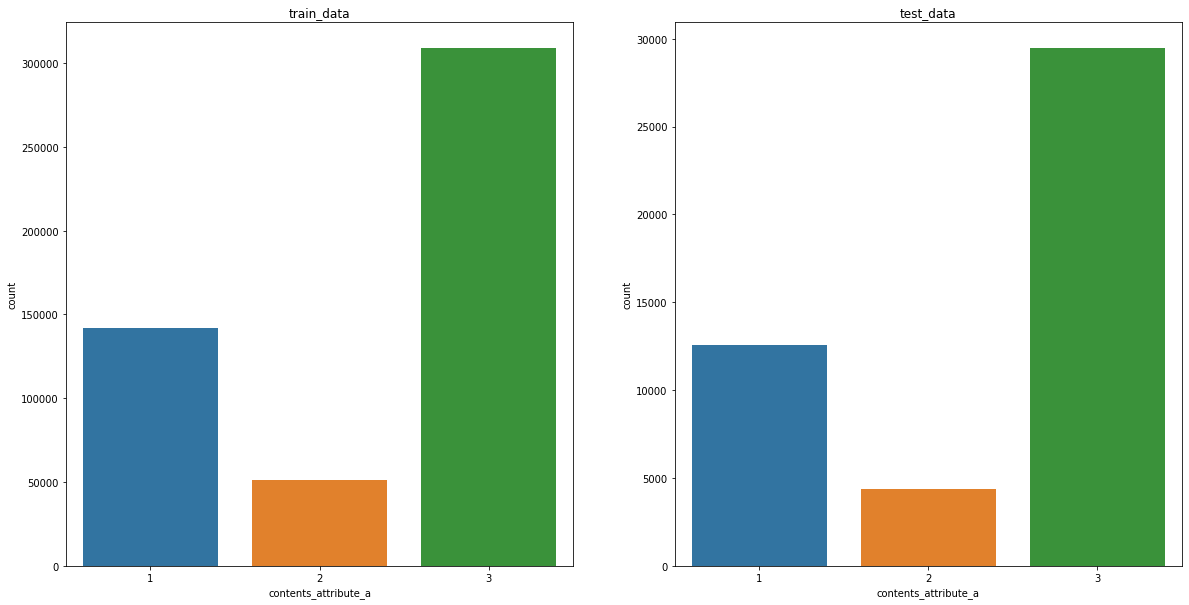

In [ ]:
# contents_attribute_a
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_a'], ax = ax[0])
sns.countplot(test_data['contents_attribute_a'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

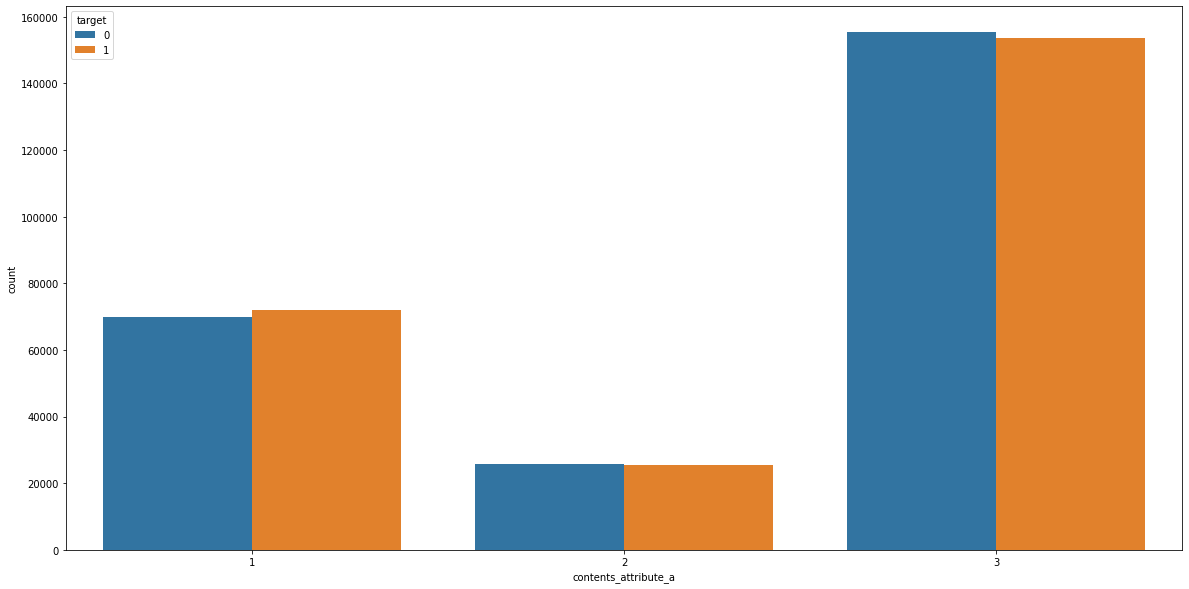

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_a', hue = 'target')

## 컨텐츠 속성 J

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

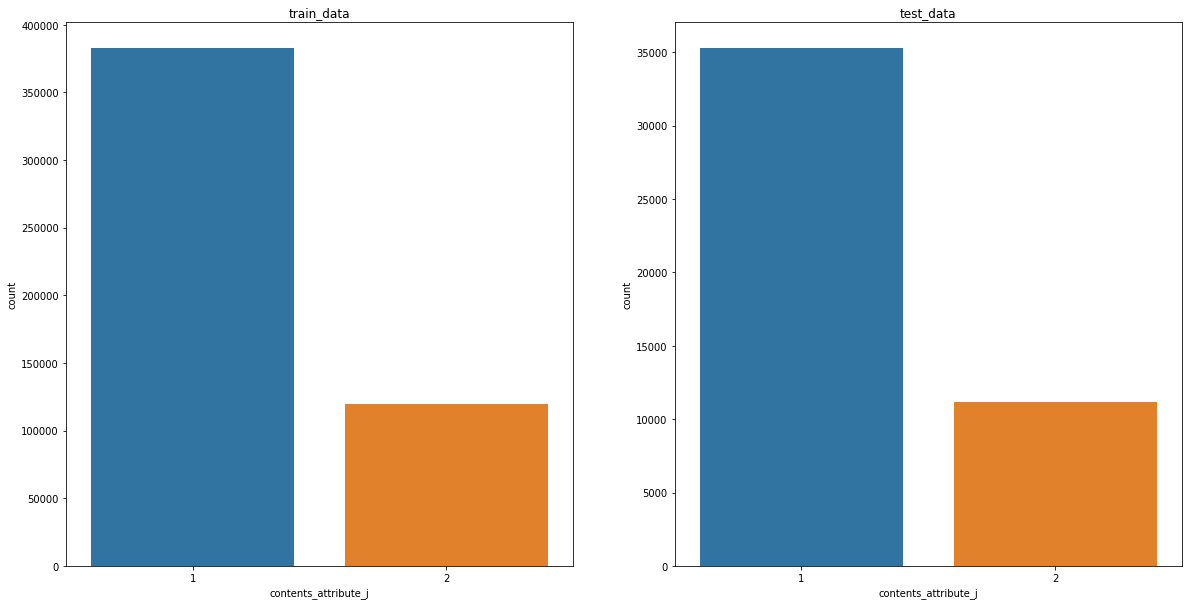

In [ ]:
# contents_attribute_j
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_j'], ax = ax[0])
sns.countplot(test_data['contents_attribute_j'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

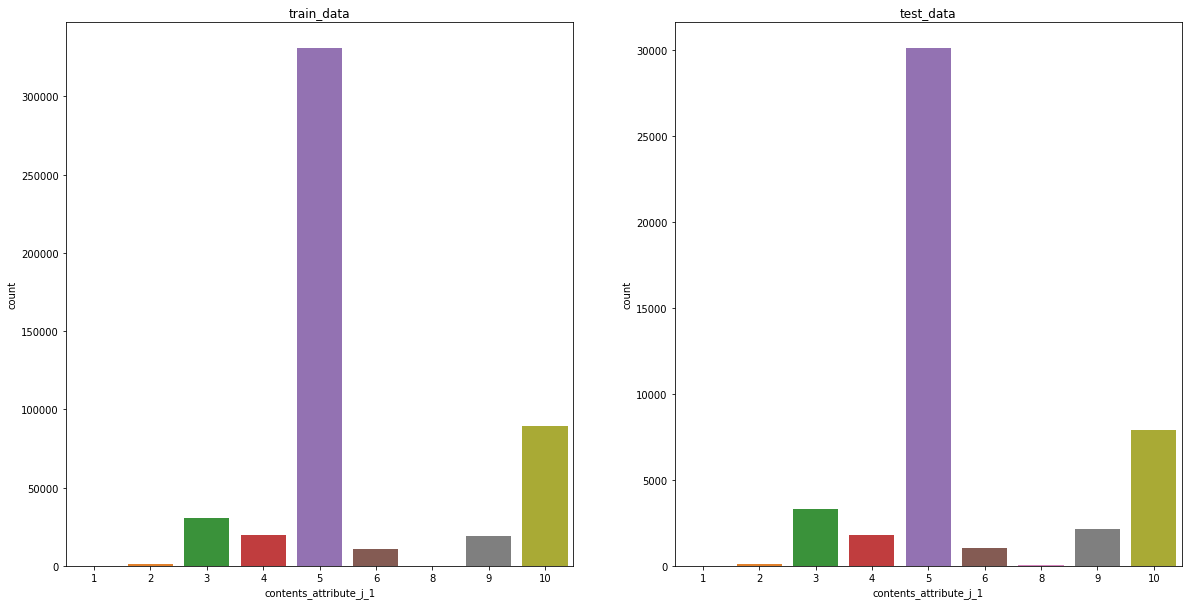

In [ ]:
# contents_attribute_j
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_j_1'], ax = ax[0])
sns.countplot(test_data['contents_attribute_j_1'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

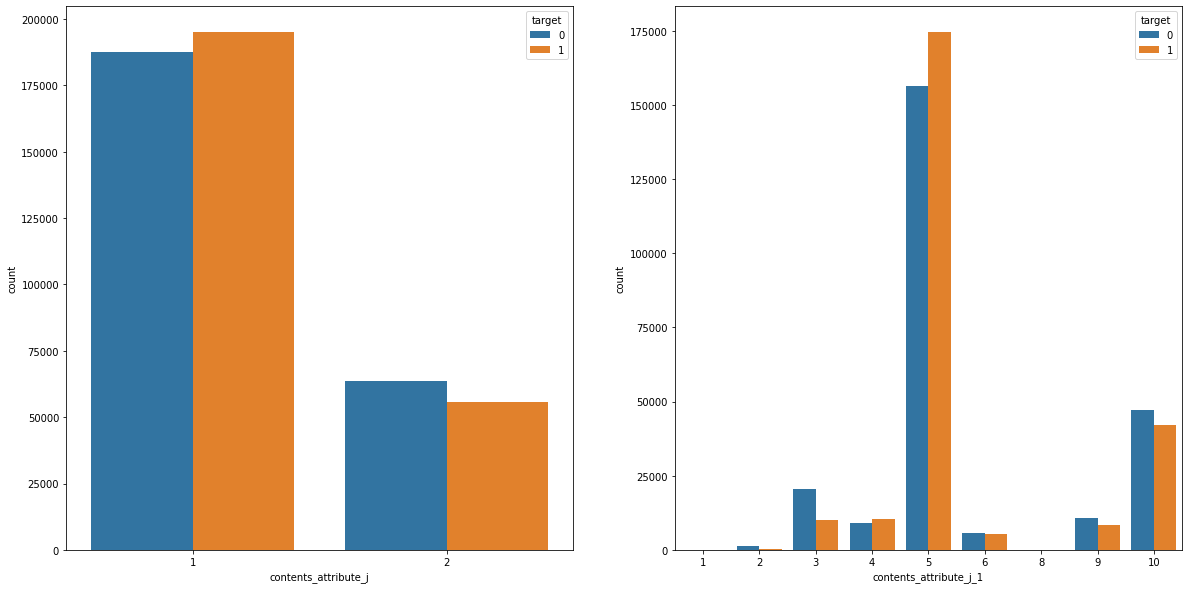

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_j', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'contents_attribute_j_1', hue = 'target', ax = ax[1])

## 컨텐츠 속성 C

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

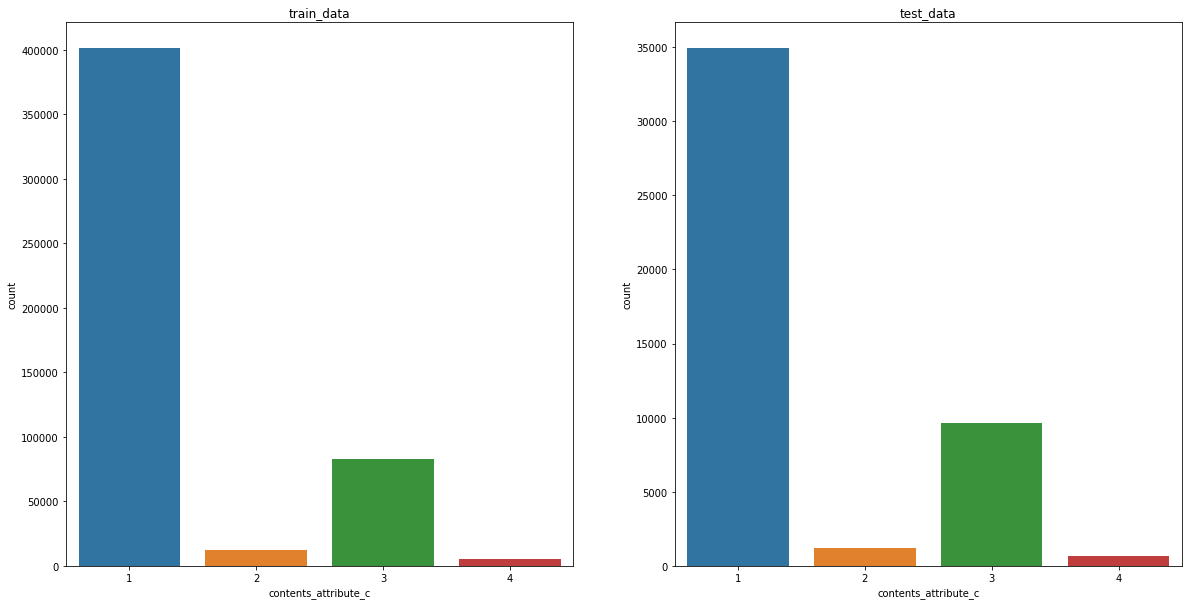

In [ ]:
# contents_attribute_k
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_c'], ax = ax[0])
sns.countplot(test_data['contents_attribute_c'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

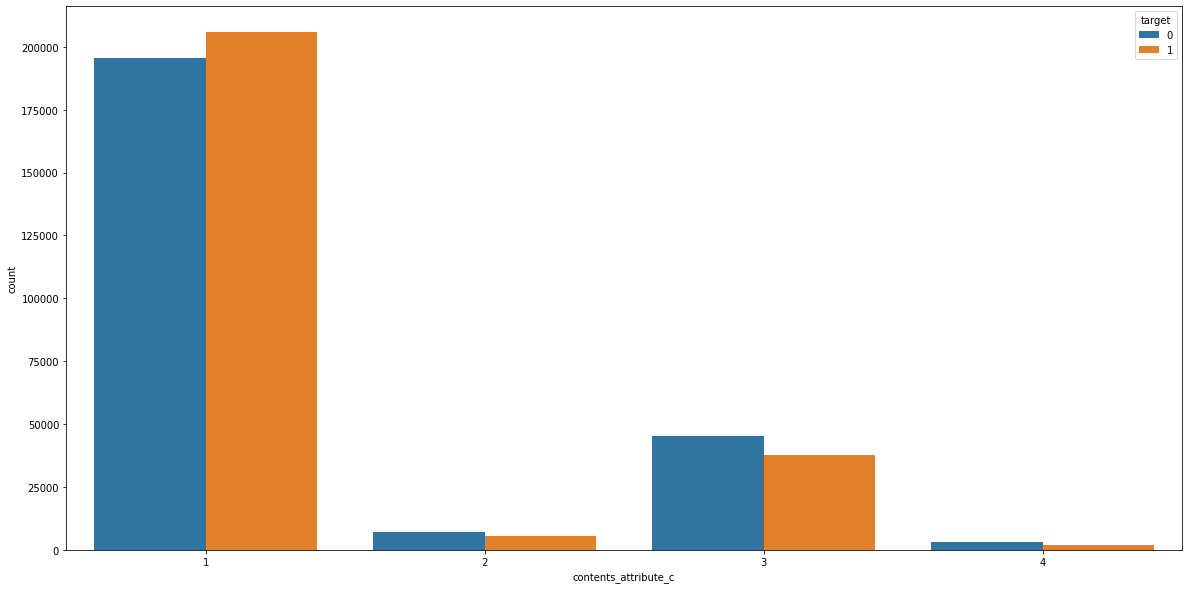

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_c', hue = 'target')


## 컨텐츠 속성 K

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

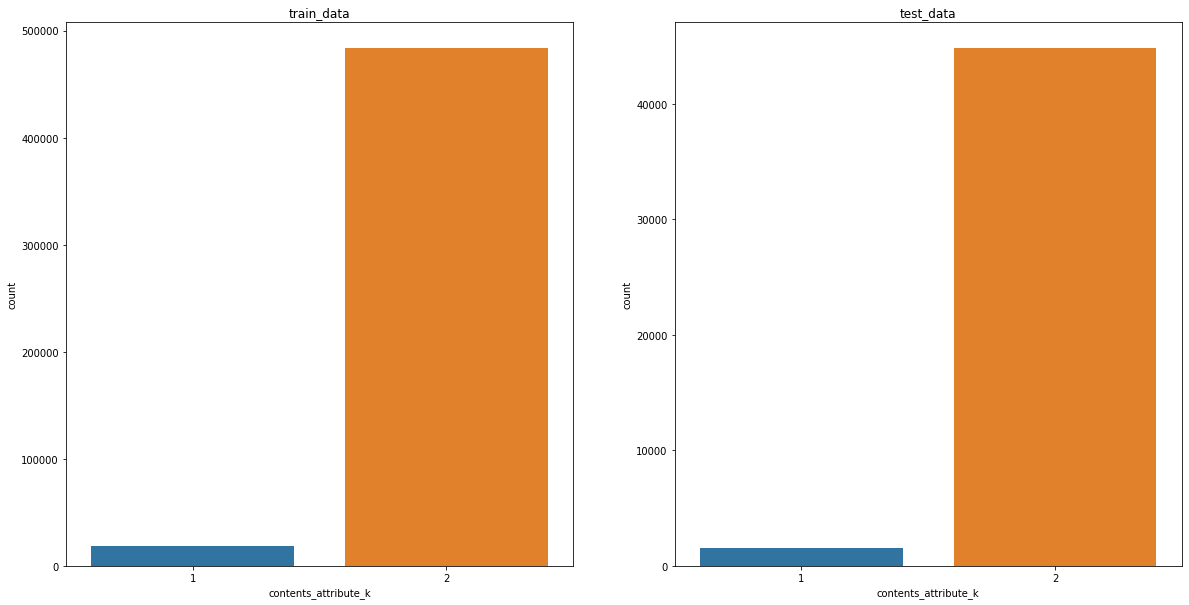

In [ ]:
# contents_attribute_k
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_k'], ax = ax[0])
sns.countplot(test_data['contents_attribute_k'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

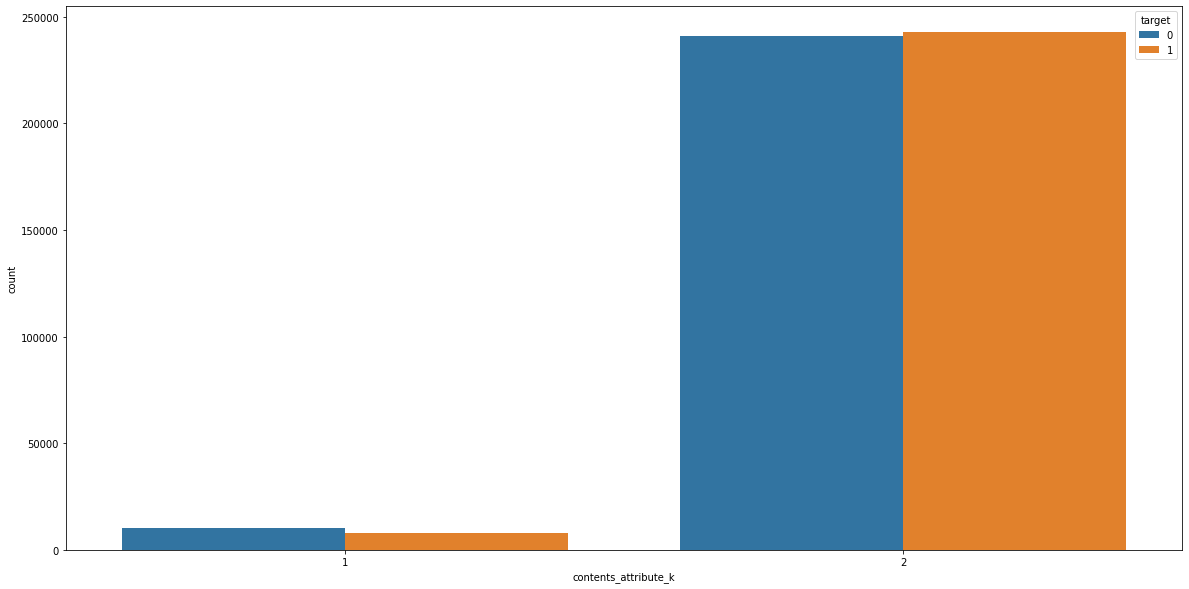

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_k', hue = 'target')

##컨텐츠 속성 L

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

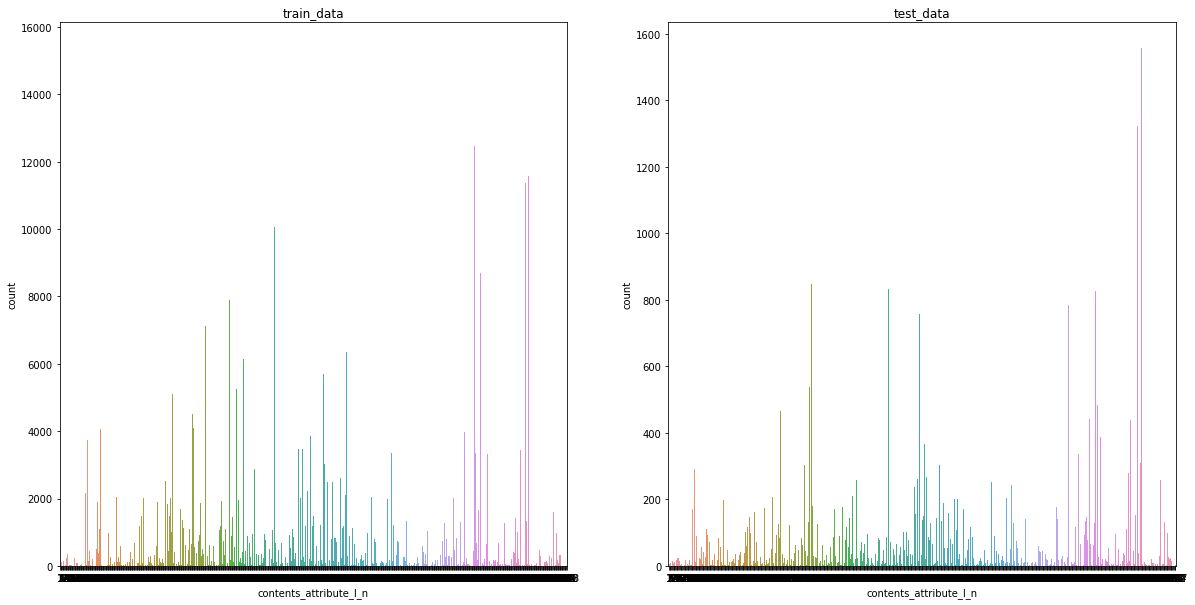

In [ ]:
# contents_attribute_l_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_n'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

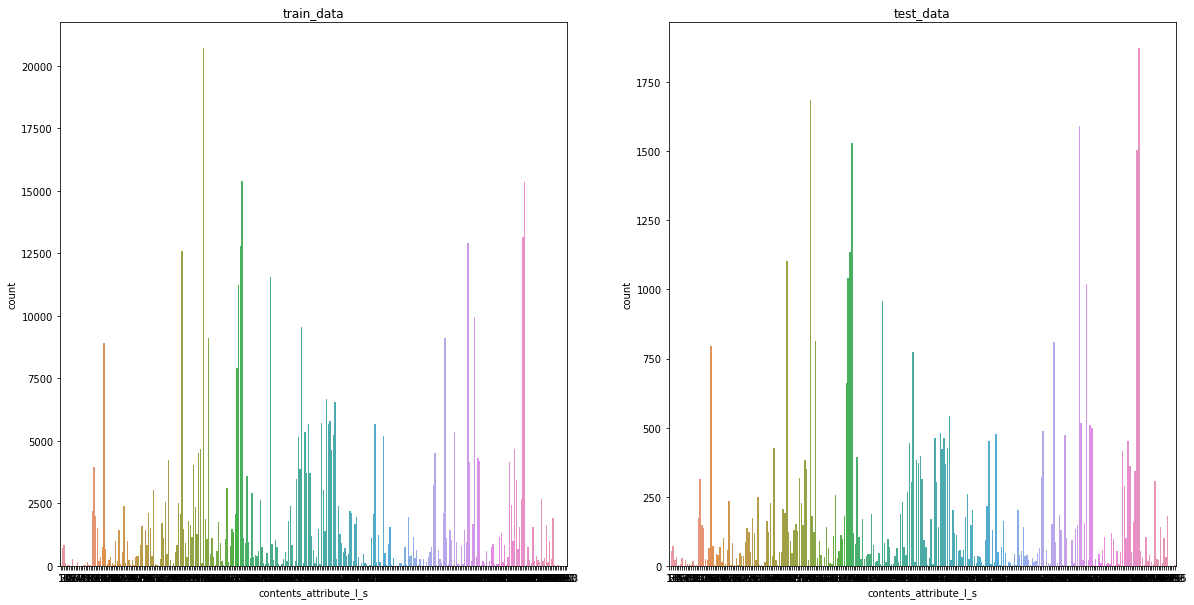

In [ ]:
# contents_attribute_l_s
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_s'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_s'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

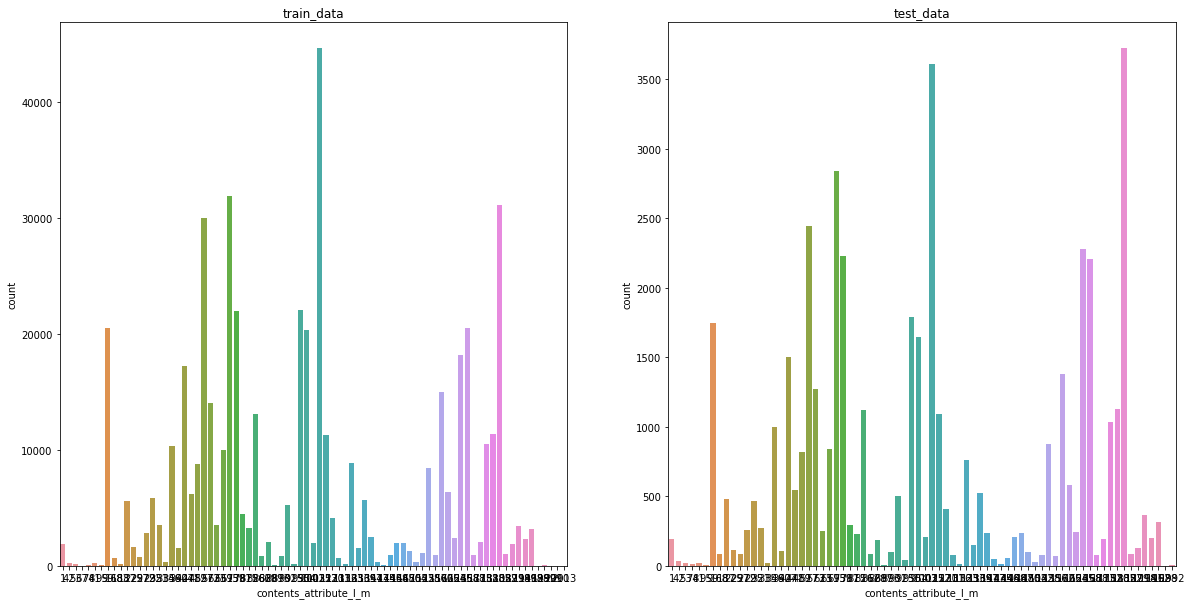

In [ ]:
# contents_attribute_l_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_m'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

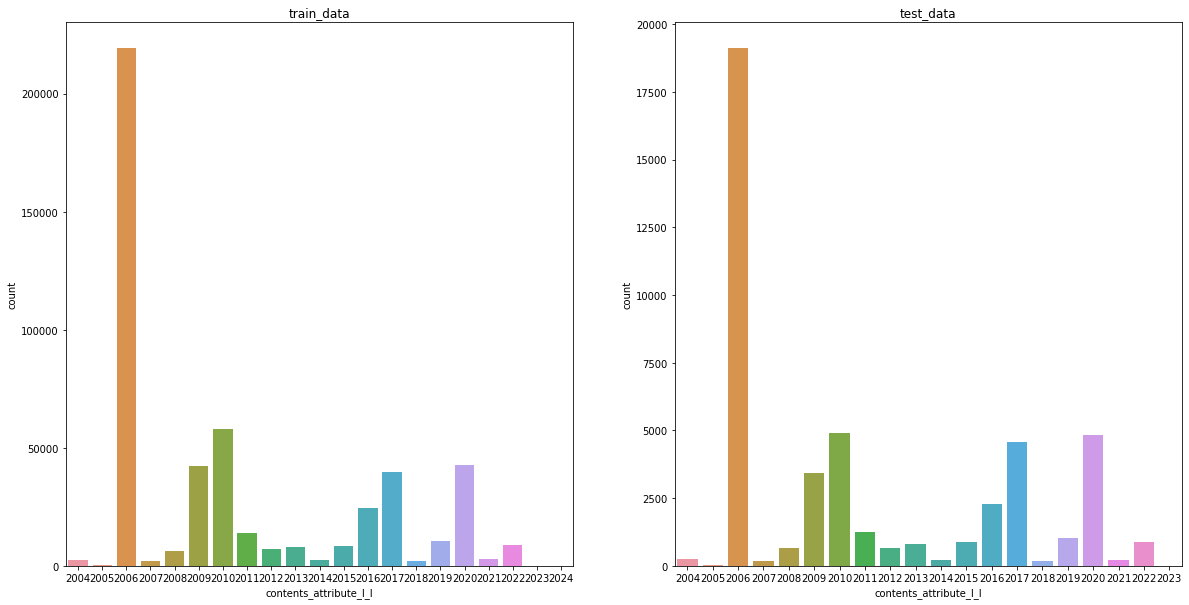

In [ ]:
# contents_attribute_l_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_l'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

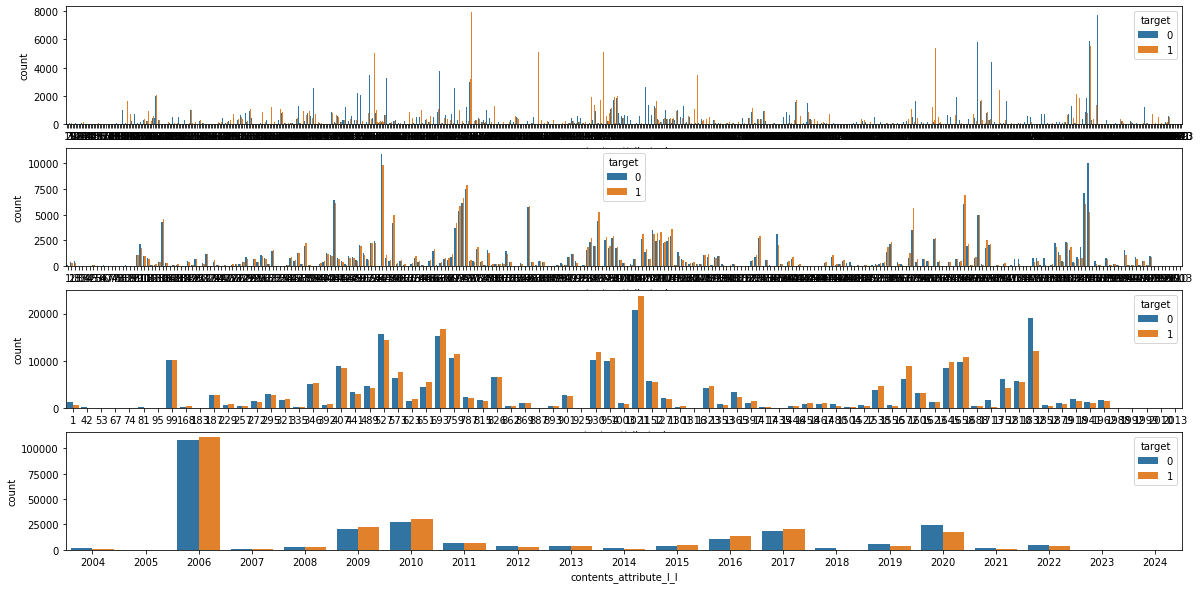

In [ ]:
fig, ax = plt.subplots(nrows = 4, figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_l_n', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'contents_attribute_l_s', hue = 'target', ax = ax[1])
sns.countplot(data = train_data, x = 'contents_attribute_l_m', hue = 'target', ax = ax[2])
sns.countplot(data = train_data, x = 'contents_attribute_l_l', hue = 'target', ax = ax[3])

## 컨텐츠 속성 D

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

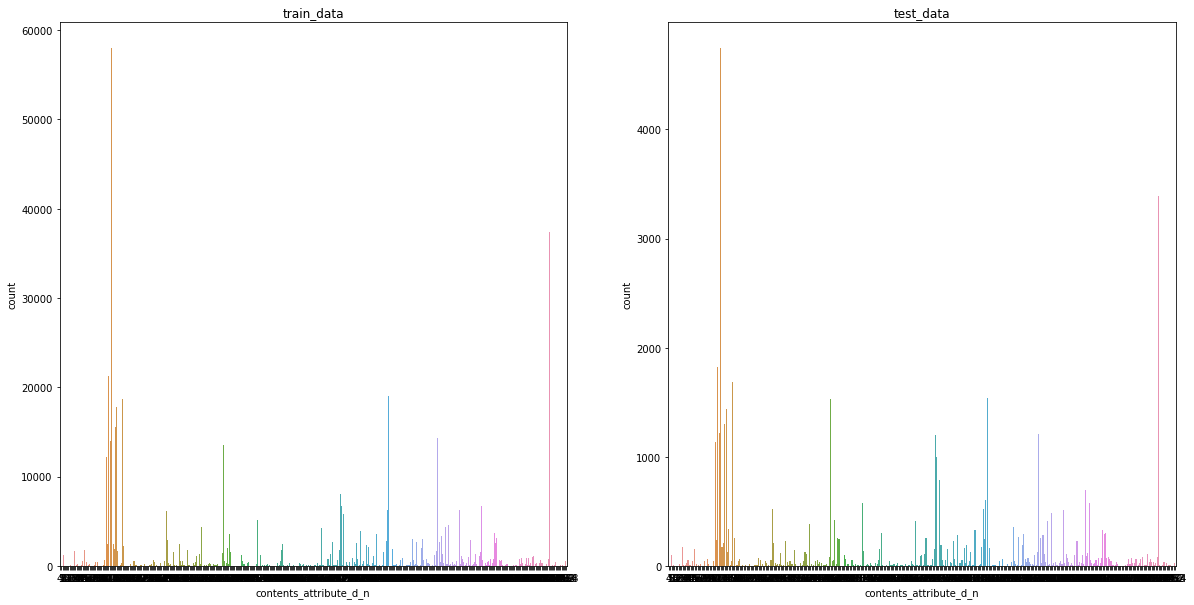

In [ ]:
# contents_attribute_d_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_n'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

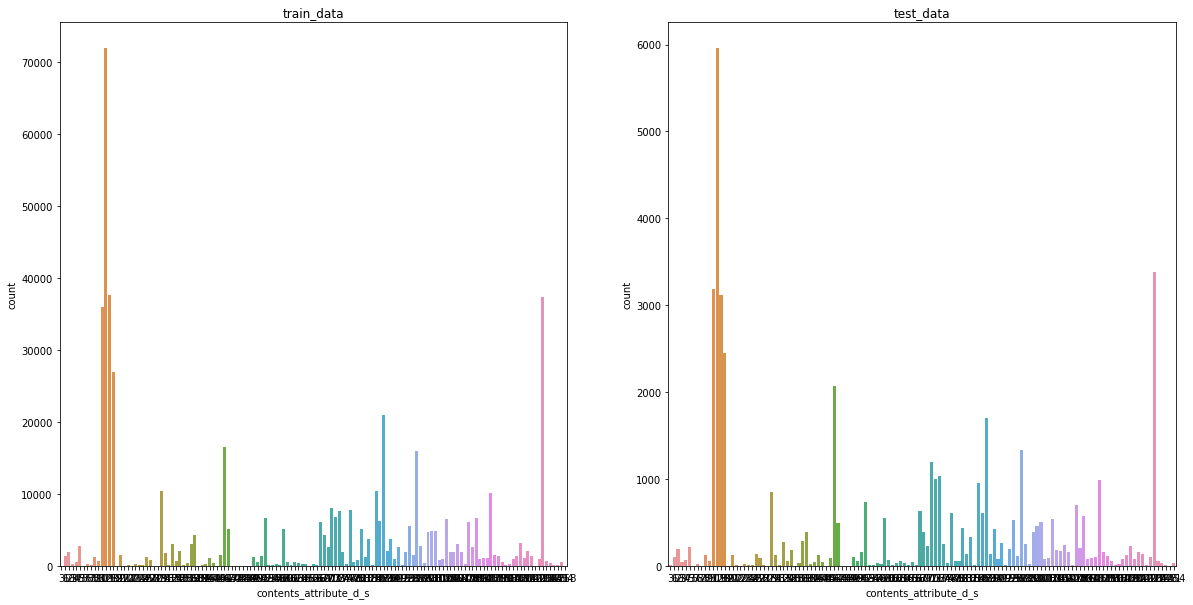

In [ ]:
# contents_attribute_d_s
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_s'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_s'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

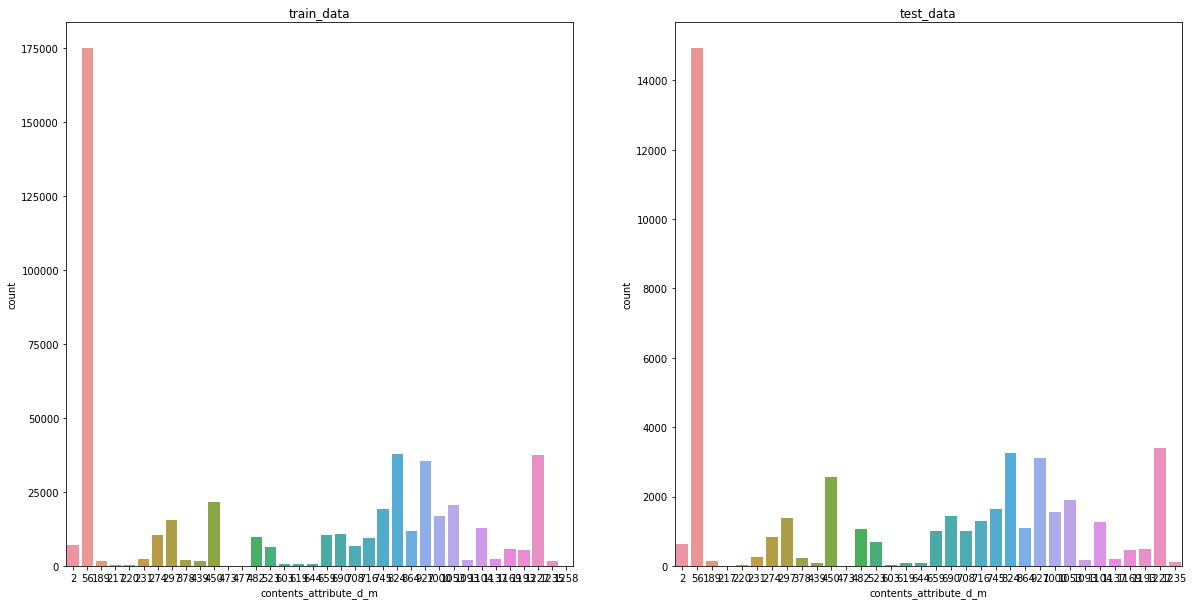

In [ ]:
# contents_attribute_d_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_m'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

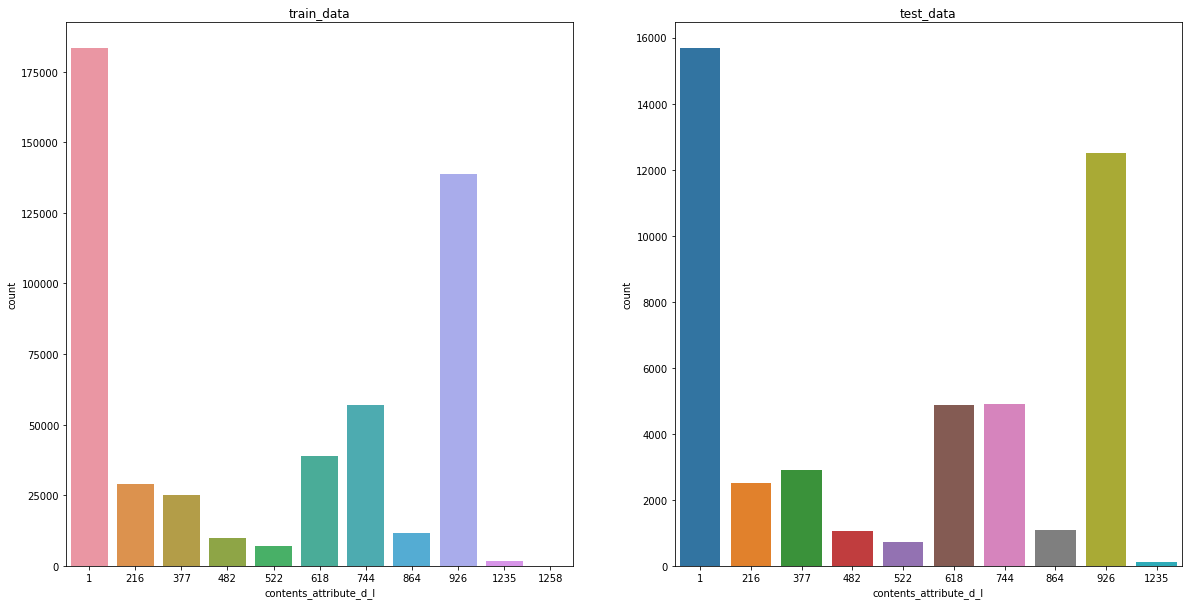

In [ ]:
# contents_attribute_d_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_l'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

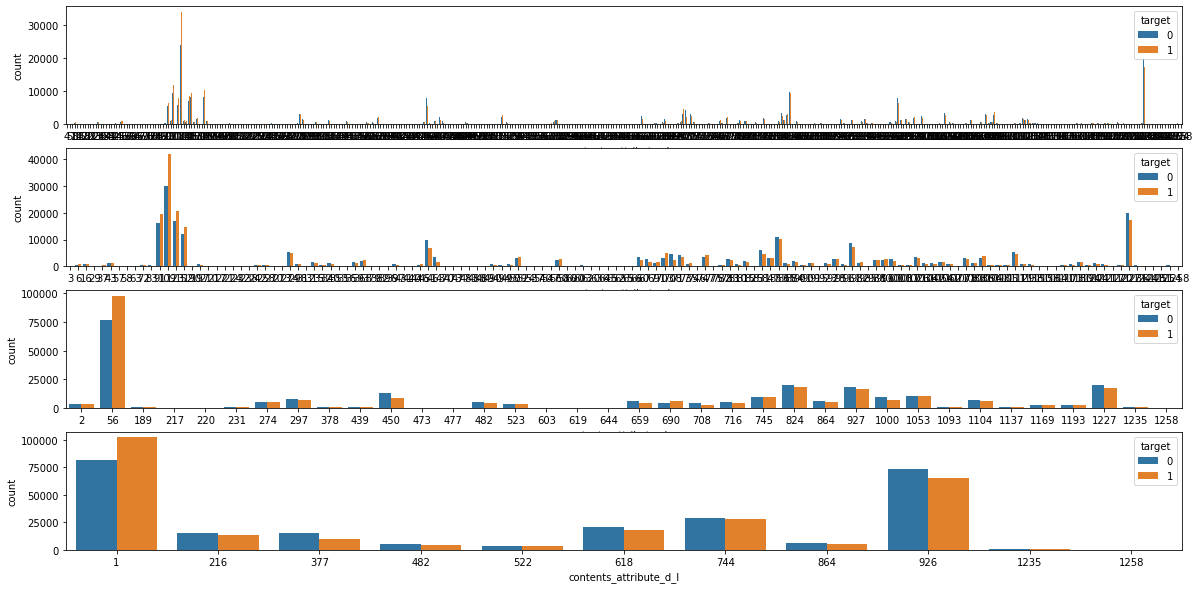

In [ ]:
fig, ax = plt.subplots(nrows = 4, figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_d_n', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'contents_attribute_d_s', hue = 'target', ax = ax[1])
sns.countplot(data = train_data, x = 'contents_attribute_d_m', hue = 'target', ax = ax[2])
sns.countplot(data = train_data, x = 'contents_attribute_d_l', hue = 'target', ax = ax[3])

## 컨텐츠 속성 M

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

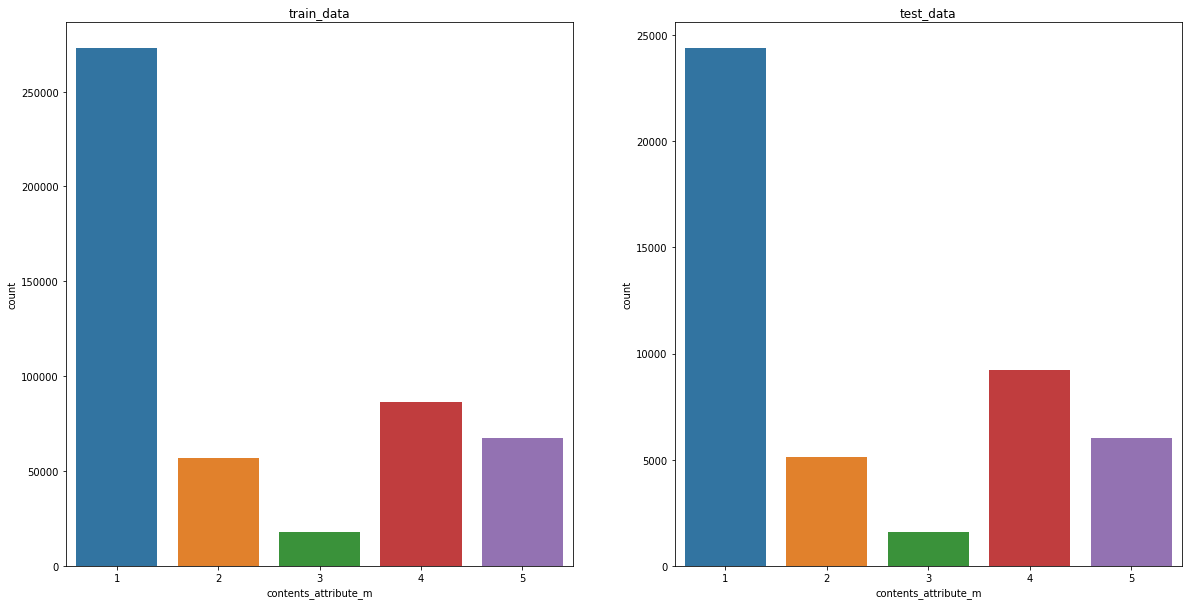

In [ ]:
# contents_attribute_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_m'], ax = ax[0])
sns.countplot(test_data['contents_attribute_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

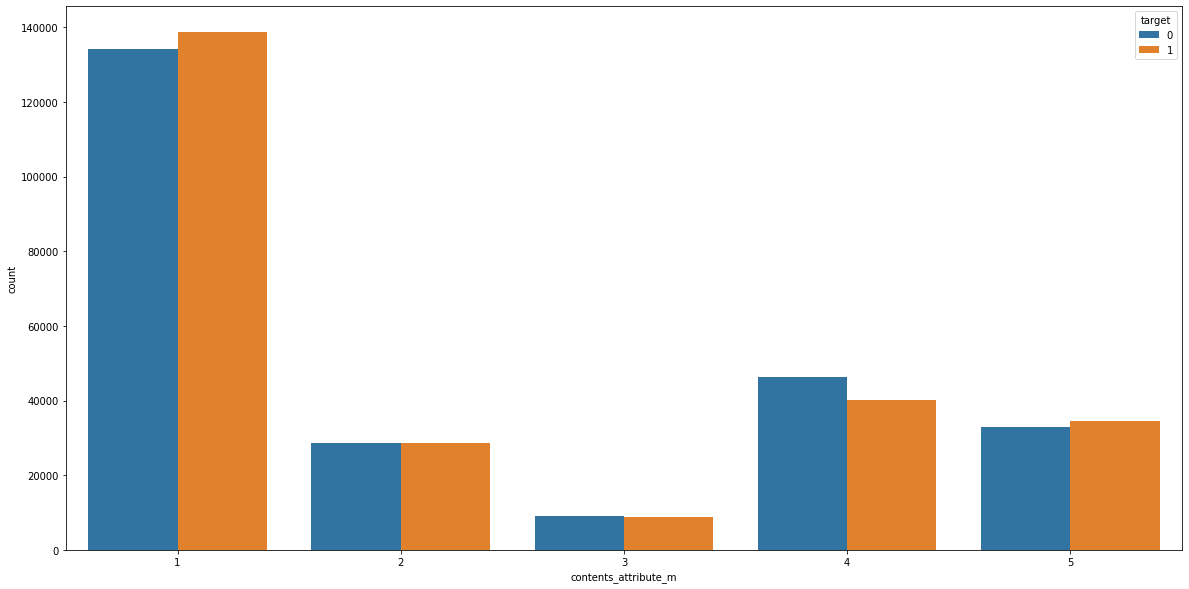

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_m', hue = 'target')

## 컨텐츠 속성 E

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

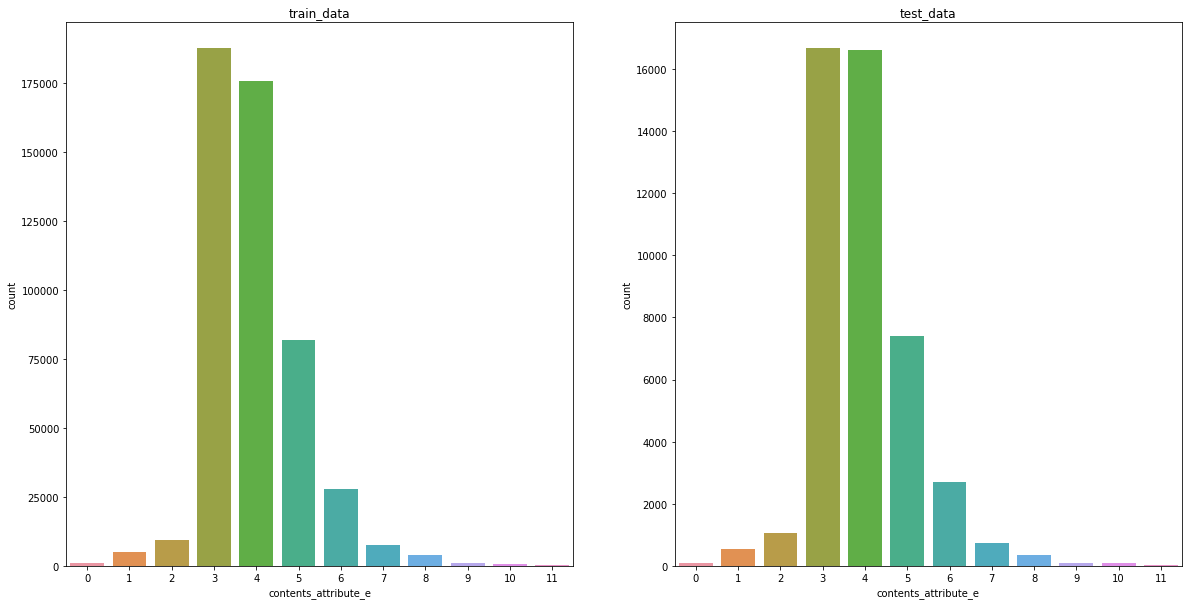

In [ ]:
# contents_attribute_e
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_e'], ax = ax[0])
sns.countplot(test_data['contents_attribute_e'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

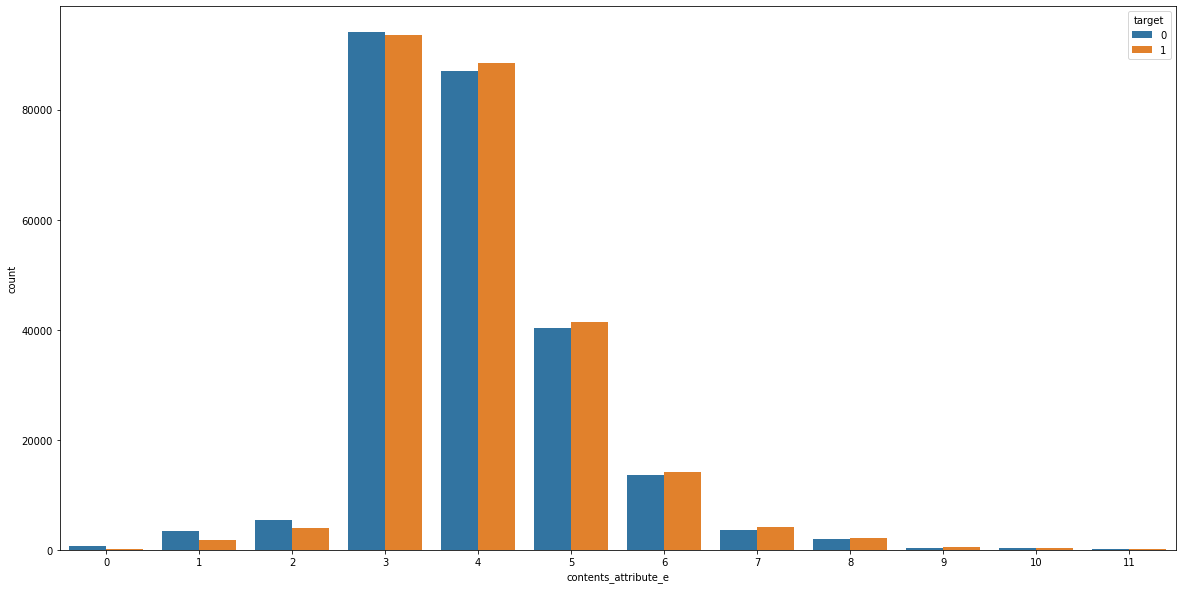

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_e', hue = 'target')

## 컨텐츠 속성 H

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

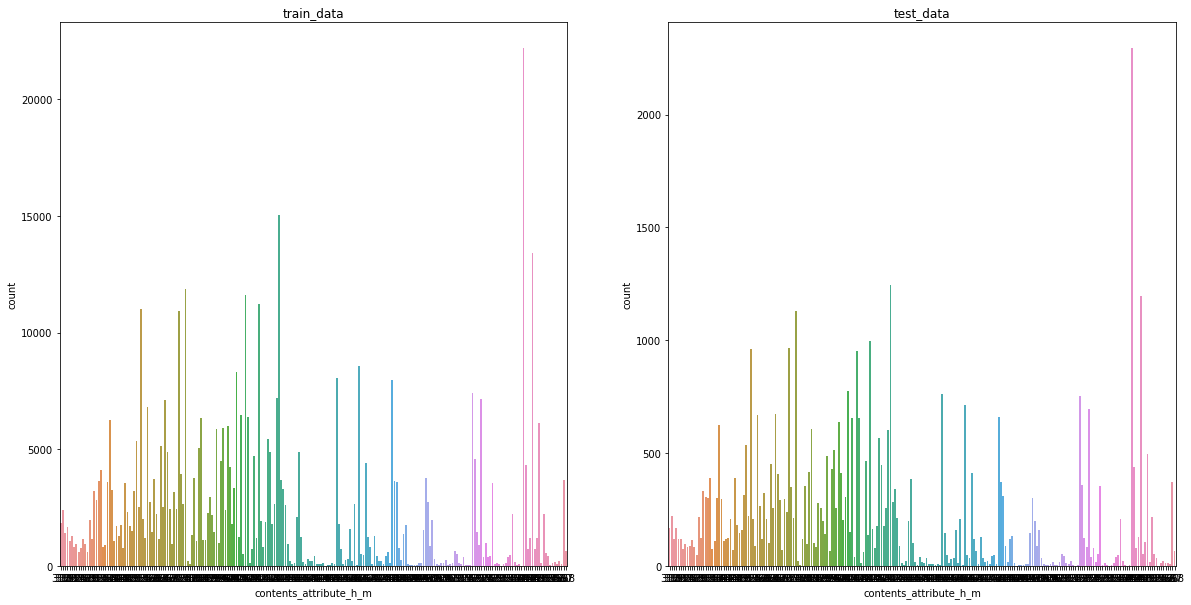

In [ ]:
# contents_attribute_h_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_h_m'], ax = ax[0])
sns.countplot(test_data['contents_attribute_h_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

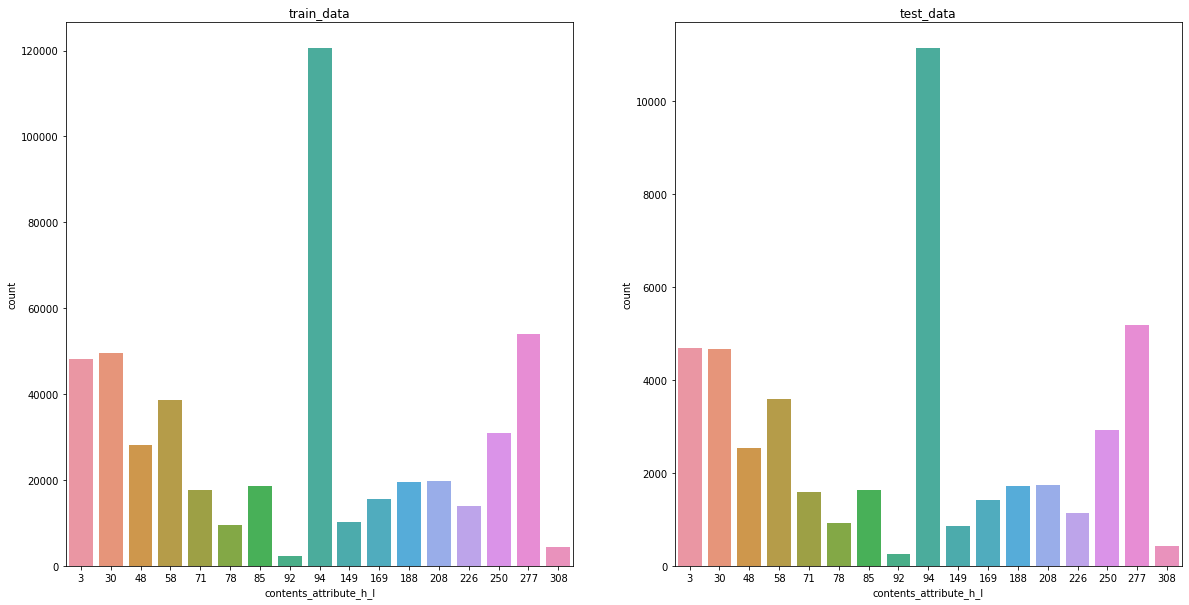

In [ ]:
# contents_attribute_h_l

fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_h_l'], ax = ax[0])
sns.countplot(test_data['contents_attribute_h_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

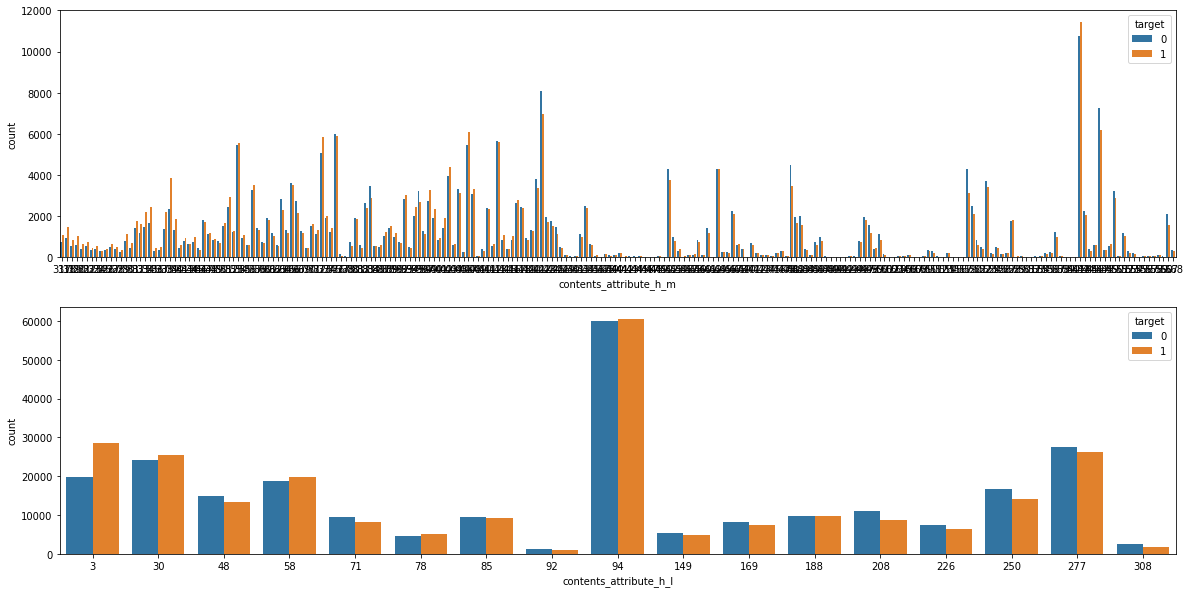

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_h_m', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'contents_attribute_h_l', hue = 'target', ax = ax[1])

전체적으로 target을 선택한 비율은 비슷비슷 하다.

train 데이터와 test 데이터 비율도 비슷비슷 하다.

# 컨텐츠 열람 일시

In [ ]:
data['month']=data['contents_open_dt'].dt.strftime("%m")
data['date']=data['contents_open_dt'].dt.strftime("%d")
data['hour']=data['contents_open_dt'].dt.strftime("%H")
data['day']=data['contents_open_dt'].dt.strftime("%A")

data['month']=data['month'].astype(int)
data['date']=data['date'].astype(int)
data['hour']=data['hour'].astype(int)

In [ ]:
month = data.groupby('month')['target'].sum().reset_index()
date = data.groupby('date')['target'].sum().reset_index()
hour = data.groupby('hour')['target'].sum().reset_index()
day = data.groupby('day')['target'].sum().reset_index()

In [ ]:
month

,month,target
0,1,22362
1,2,24623
2,3,24406
3,4,21690
4,5,21416
5,6,23790
6,7,24004
7,8,22384
8,9,21340
9,10,22791


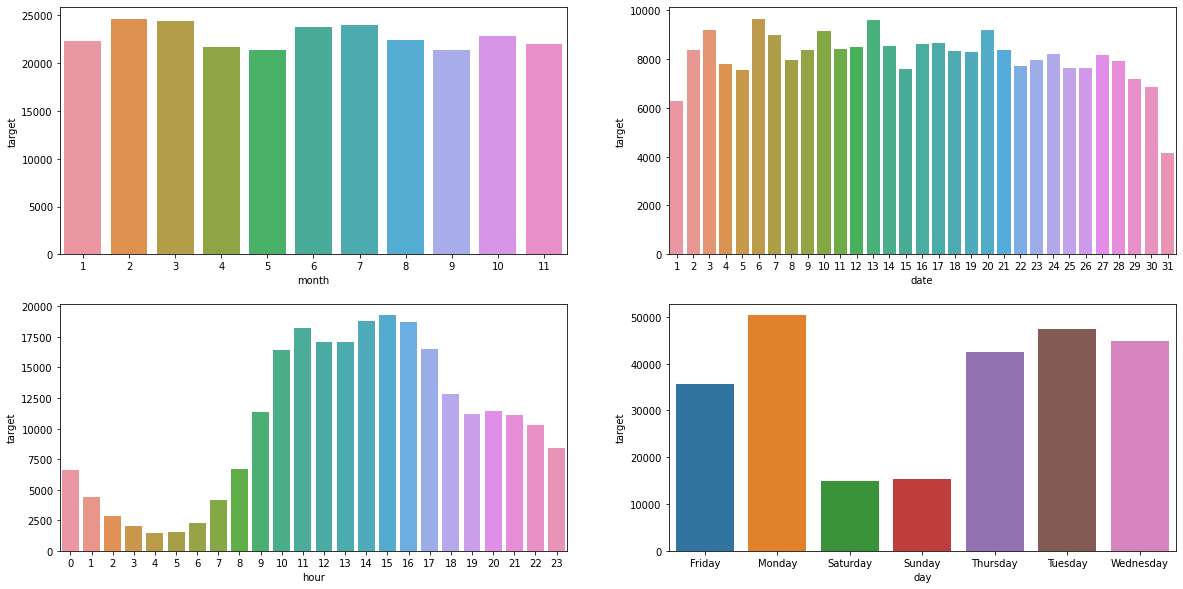

In [ ]:
figure, ax =plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,10)


sns.barplot(data = month, x = 'month', y = 'target', ax=ax[0][0])
sns.barplot(data = date, x = 'date', y = 'target', ax=ax[0][1])
sns.barplot(data = hour, x = 'hour', y = 'target', ax=ax[1][0])
sns.barplot(data = day, x = 'day', y = 'target', ax=ax[1][1])


월과 일에는 영향이 별로 없음

낮시간에 이용빈도가 높음

평일에 이용빈도가 높고 주말에는 빈도가 낮음